<h2 align=center><font size = 6 color="blue"> Project-Featurization and Model Tuning -(Ratnesh Gupta) </font></h2>

<h3><u>Data Description:</u></h3><br>

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

<h3><u>Domain:</u></h3><br> 

Cement manufacturing

<h3><u>Context:</u></h3><br>
        
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water,superplasticizer, coarse aggregate, and fine aggregate.

<h3> Attribute Information:</h3><br>
    
   **Cement**   :       measured in kg in a m3 mixture.<br>
    **Blast**    :       measured in kg in a m3 mixture<br>
    **Fly ash**  :       measured in kg in a m3 mixture<br>
    **Water**    :       measured in kg in a m3 mixture<br>
    **Superplasticizer**  : measured in kg in a m3 mixture<br>
    **Coarse Aggregate**  : measured in kg in a m3 mixture<br>
    **Fine Aggregate**    : measured in kg in a m3 mixture<br>
    **Age**               : day (1~365)<br>
    **Concrete compressive strength** :  measured in MPa<br>

<h3><u>Learning Outcomes:</u></h3><br>
<ul>
<li> Exploratory Data Analysis. </li>
<li> Building ML models for regression. </li>
<li> Hyper parameter tuning. </li>
</ul>


**<h3><u>Steps and tasks:</u></h3>**<br>
<ul>
<li><h4>1. Deliverable -1 (Exploratory data quality report reflecting the following)(20 marks)</h4></li>
    <ul>
        <li>a. Univariate analysis (5 marks)</li>
i. Univariate analysis – data types and description of the independent attributes which should include (name,
meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of
the body of distributions / tails, missing values, outliers</li>
    <li>b. Multivariate analysis (5 marks)</li>
i. Bi-variate analysis between the predictor variables and between the predictor variables and target column.
Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points.Visualize the analysis using boxplots and pair plots,histograms or density curves. Select the most appropriate attributes</li>
        <li>c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation (10 marks)</li>
        </ul>
<li><h4>2. Deliverable -2 (Feature Engineering techniques) (15 marks)</h4></li>
<ul>
<li>a. Identify opportunities (if any) to create a composite feature, drop a
feature etc. (5 marks)</li>
<li>b. Decide on complexity of the model, should it be simple linear
model in terms of parameters or would a quadratic or higher
degree help (5 marks)</li>
<li>c. Explore for gaussians. If data is likely to be a mix of gaussians,
explore individual clusters and present your findings in terms of the
independent attributes and their suitability to predict strength (5
marks)</li>
</ul>
<li><h4>3. Deliverable -3 (create the model ) ( 15 marks)</h4></li>
    <ul>
<li>a. Obtain feature importance for the individual features and present
your findings</li>
    </ul>
    <li><h4>4. Deliverable -4 (Tuning the model) (20 marks)</h4></li>
<ul>
<li>a. Algorithms that you think will be suitable for this project (5 marks)</li>
<li>b.Techniques employed to squeeze that extra performance out of
the model without making it overfit or underfit (5 marks)</li>
<li>c. Model performance range at 95% confidence level (10 marks)</li>
    </ul>
</ul>    

<h2 align=left><font size = 4 color="green"> Importing the Libraries </font></h2>

In [1]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans

In [2]:
#Change the directory Path
os.chdir('/home/ratnesh/Downloads/StudyMaterialAIML/GL/FeaturizationModelSelectionTuning/Project/')

#Read the Data File and load into Panda DataFrame
myData = pd.read_csv('concrete.csv')

#Copy the DataFrame into new Name
myData1=myData.copy()

#First 5 lines of DataFrame
myData.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [3]:
myData.tail()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61

<h2 align=left><font size = 4 color="green"> Understanding the Data and Attributes </font></h2>

In [4]:
#Attributes of Data
myData.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [5]:
#Shape of data
#print("The dataframe has {} rows and {} columns".format(vehicle_df.shape[0],vehicle_df.shape[1]))
print('Total Rows = {}'.format(myData.shape[0]))
print('Total Cols = {}'.format(myData.shape[1]))
myData.shape

Total Rows = 1030
Total Cols = 9


(1030, 9)

In [6]:
#Data Types of attributes
myData.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
#Details about attributes and Data
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


No missing values, so can directly go ahead and analyze the features in detail.

<h2 align=left><font size = 4 color="green"> Exploratory Data Analysis </font></h2>

In [8]:
#5 point summary of Numerical columns
#myData.describe()
#myData.describe().T
myData.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

### Observation :-
Three attributes (slag, ash and superplastic) have min value 0. <br>
These can be missing values , let see the count of 0 values in given columns


In [9]:
print("Value 0 count in slag column\t", myData[myData['slag'] == 0]['slag'].count())
print("Value 0 count in ash column\t", myData[myData['ash'] == 0]['ash'].count())
print("Value 0 count in superplastic column\t", myData[myData['superplastic'] == 0]['superplastic'].count())

Value 0 count in slag column	 471
Value 0 count in ash column	 566
Value 0 count in superplastic column	 379


### Observation :-
0 in high volume in attributes slag, ash and superplastic.<br>
So we assume 0 is a valid value for above attributes.

### Checking for mising values

In [10]:
#Missing values count in each attributes of DataFrame
#myData.isnull().sum()
myData.apply(lambda x: sum(x.isnull()))

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
#count of missing in DataFrame
myData.isnull().values.sum()

0

### Observation :-
overall no missing values are in data

In [12]:
#Skewness in data of each attribute
myData.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

### Observation :-
Attributes slag, superplastic and age have highly skewed data

<h2 align=left><font size = 4 color="green"> Univarient Analysis </font></h2>

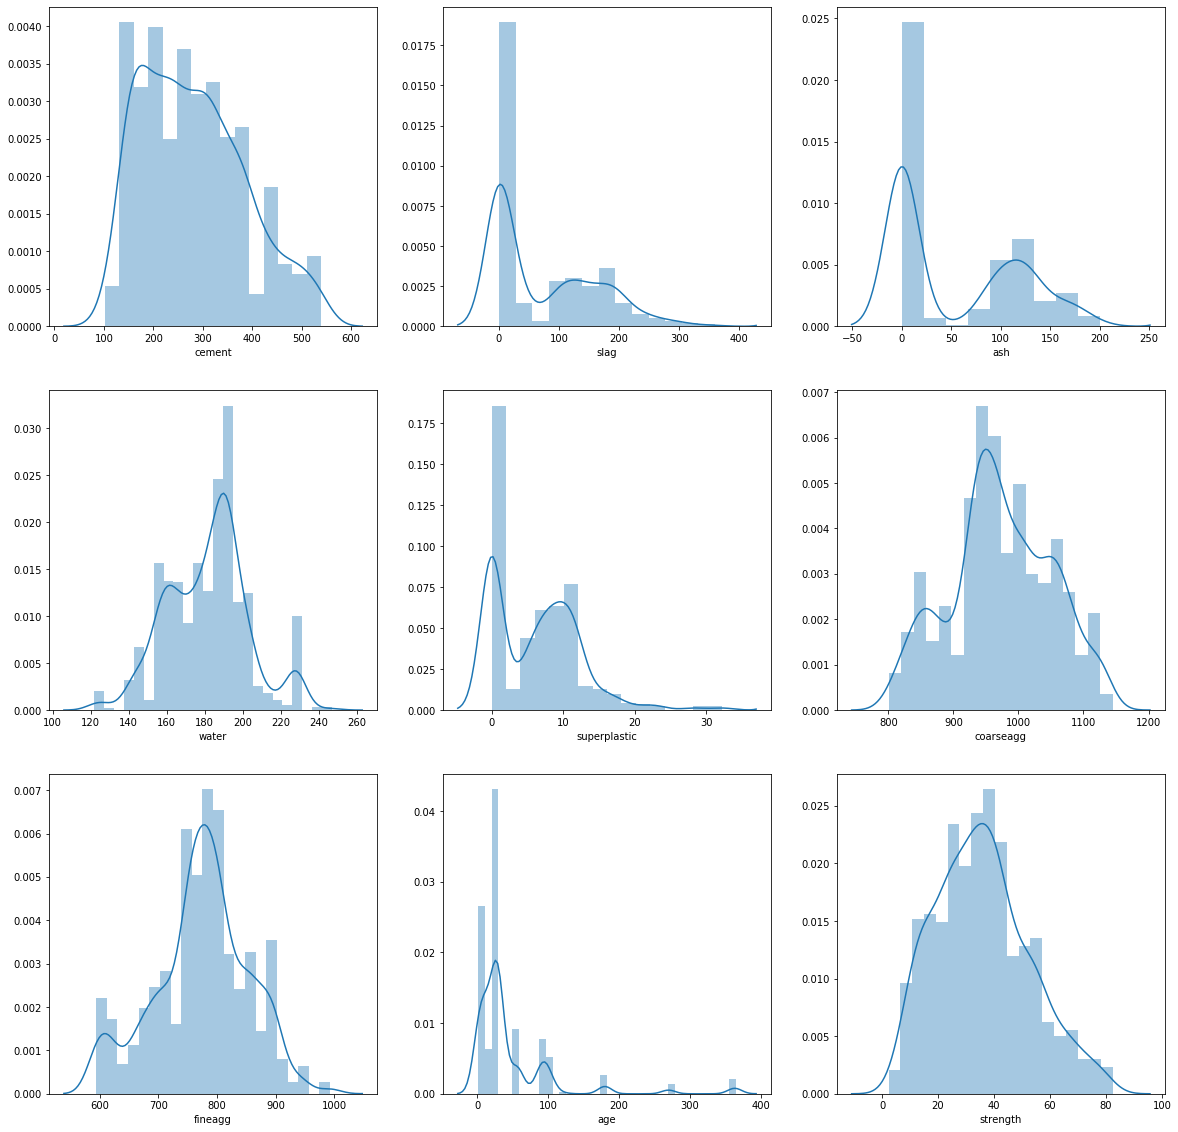

In [13]:
num_features=[col for col in myData.select_dtypes(np.number).columns ]

plt.figure(figsize=(20,20))
for i,col in enumerate(num_features,start=1):
    plt.subplot(3,3,i);
    sns.distplot(myData[col])
plt.show()

### Observation :-
Attributes slag, superplastic and age have highly skewed data. <br>
Attributes cement, water, fineagg, strength and coarseagg have more or less equally distributed data

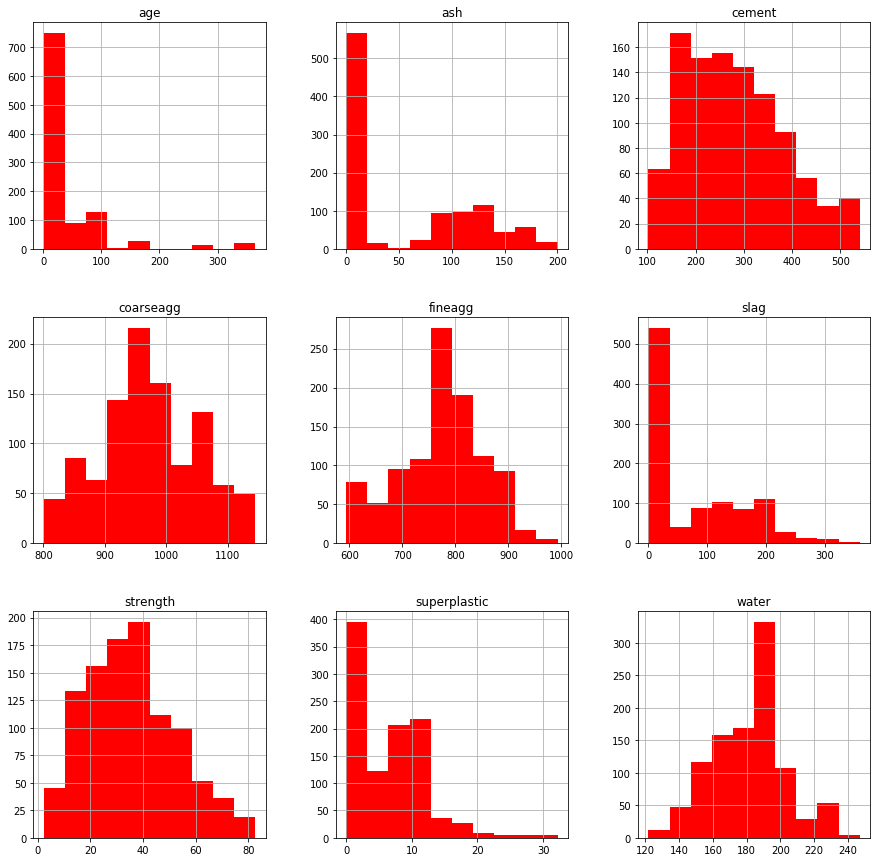

In [14]:
#Distribution of data

myData.hist( figsize=(15,15), color='red')
plt.show()

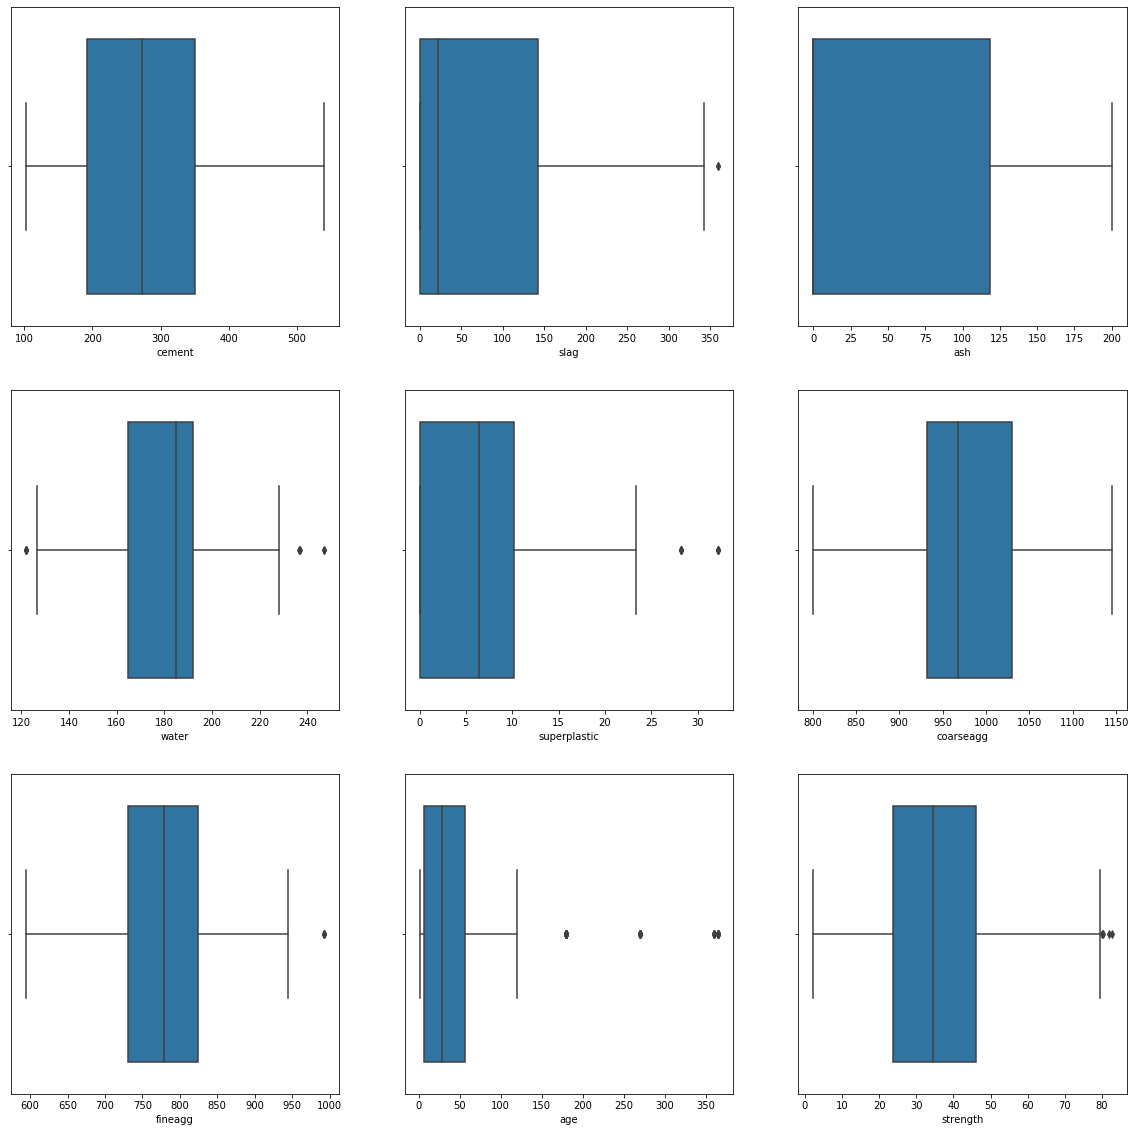

In [15]:
num_features=[col for col in myData.select_dtypes(np.number).columns ]

plt.figure(figsize=(20,20))
for i,col in enumerate(num_features,start=1):
    plt.subplot(3,3,i);
    sns.boxplot(myData[col]);
plt.show()

### Observation :-
Attributes slag, water, superplastic, fineagg, age and strength have outliers values

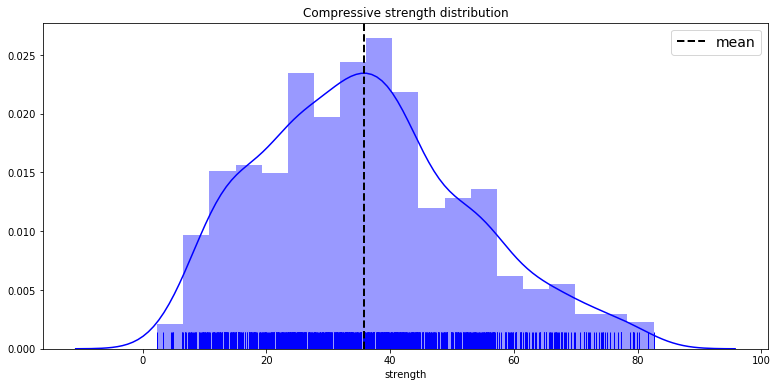

In [16]:
plt.figure(figsize=(13,6))
sns.distplot(myData["strength"],color="b",rug=True)
plt.axvline(myData["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressive strength distribution")
plt.show()

Target column looks quite balanced

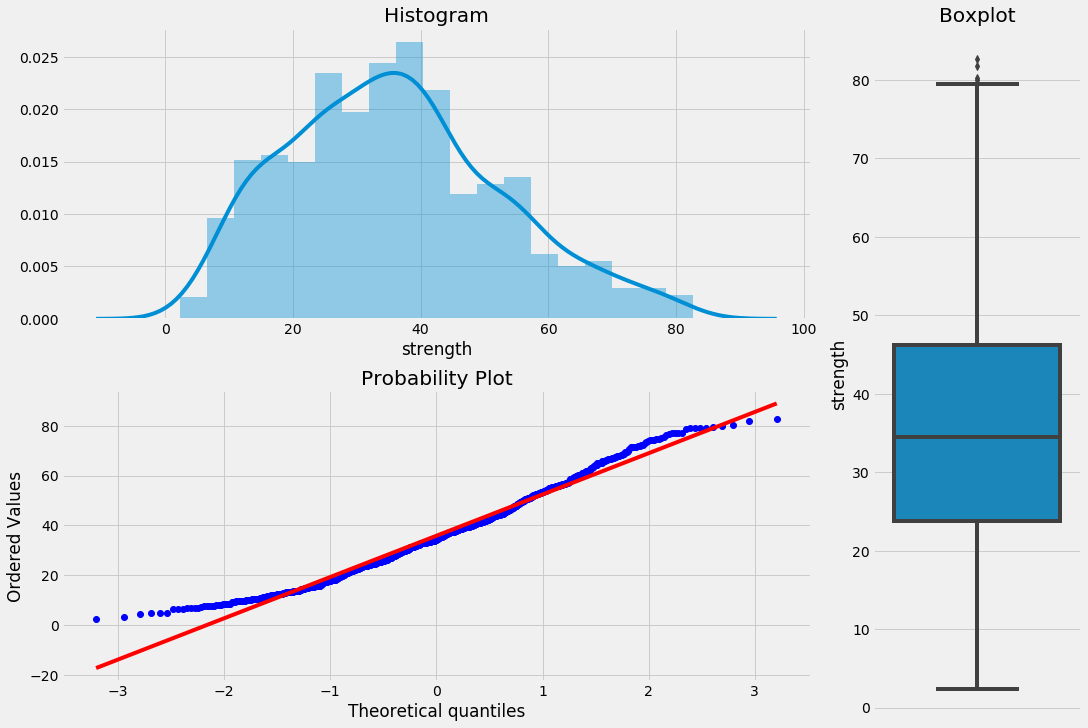

In [17]:
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import scipy.stats as stats

def plotting_3_chart(myData, feature):
    style.use('fivethirtyeight')

    fig = plt.figure(constrained_layout = True, figsize = (15,10))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(myData.loc[:, feature], norm_hist = True, ax = ax1)

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ plot')
    stats.probplot(myData.loc[:, feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title('Boxplot')
    sns.boxplot(myData.loc[:, feature], orient = 'v', ax = ax3)
    
plotting_3_chart(myData, 'strength')

<h2 align=left><font size = 4 color="green"> Multivarient Analysis </font></h2>

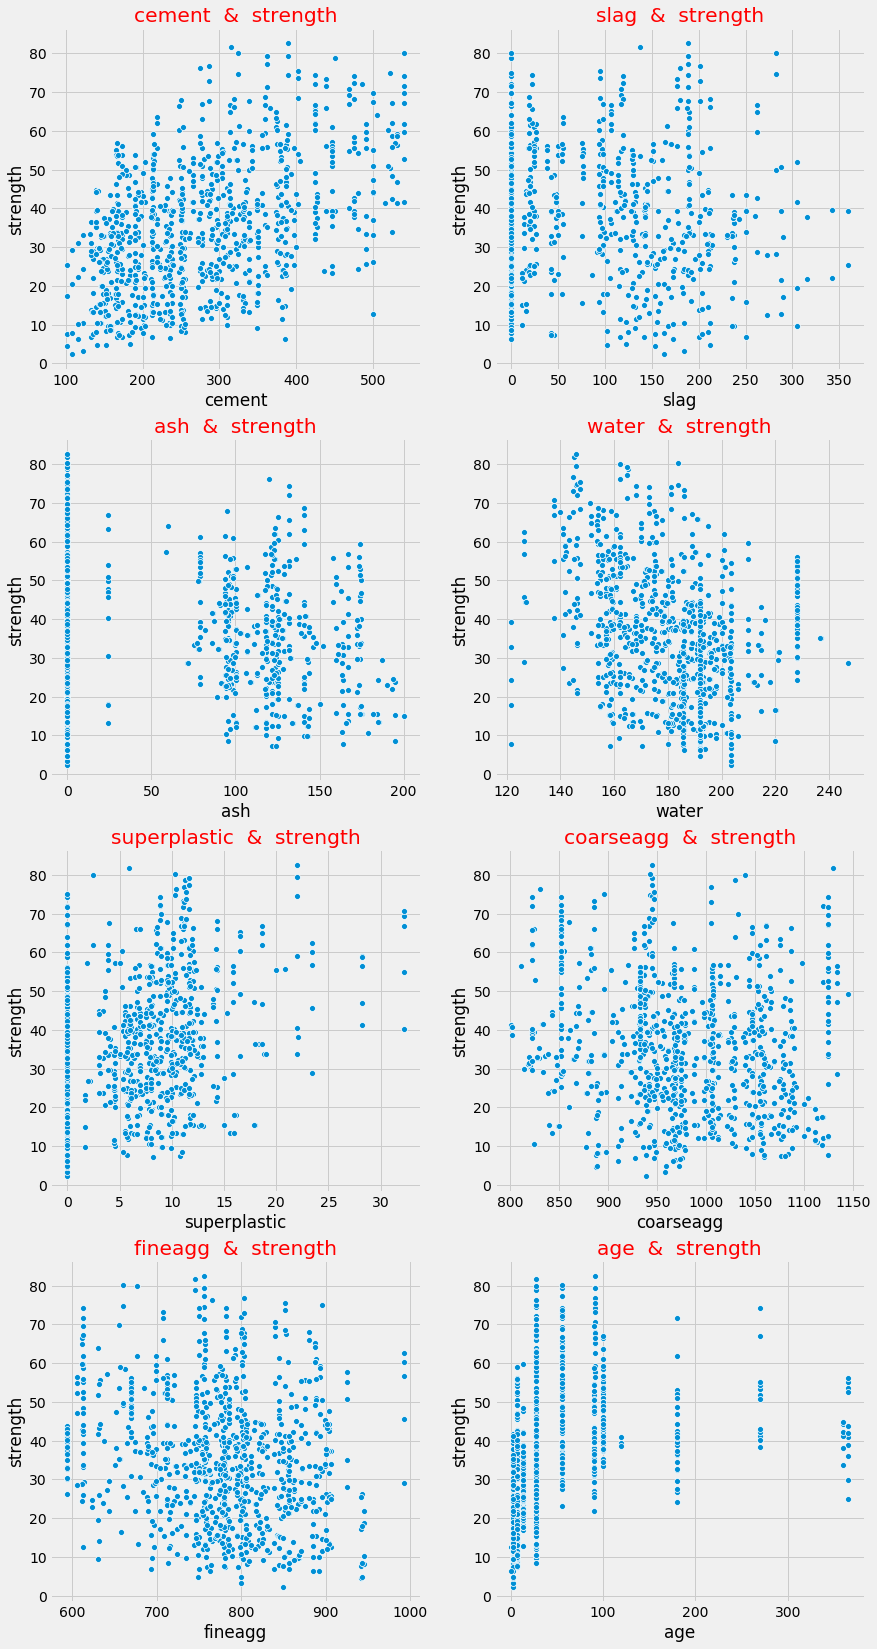

In [18]:
cols = [i for i in myData.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.scatterplot(myData[i], myData["strength"])
    plt.title(i+"  &  strength",color="red")

<Figure size 864x432 with 0 Axes>

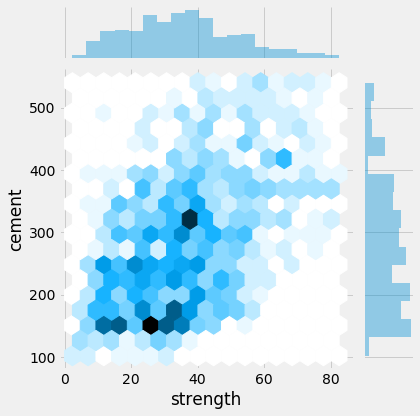

In [19]:
plt.figure(figsize=(12,6))
sns.jointplot(myData["strength"], myData["cement"], kind="hex")

plt.show()


<Figure size 864x432 with 0 Axes>

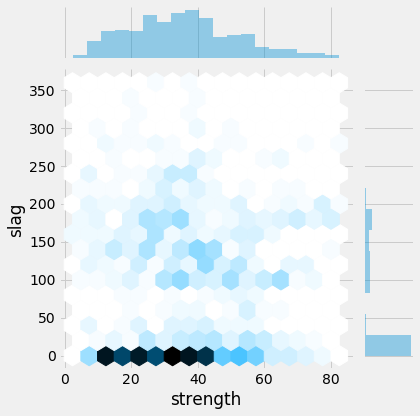

In [20]:
plt.figure(figsize=(12,6))
sns.jointplot(myData["strength"], myData["slag"], kind="hex")
plt.show()

<Figure size 864x432 with 0 Axes>

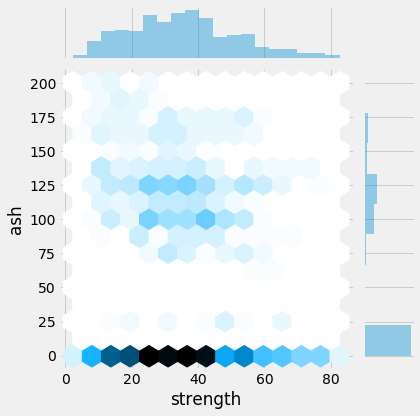

In [21]:
plt.figure(figsize=(12,6))
sns.jointplot(myData["strength"], myData["ash"], kind="hex")
plt.show()

<Figure size 864x432 with 0 Axes>

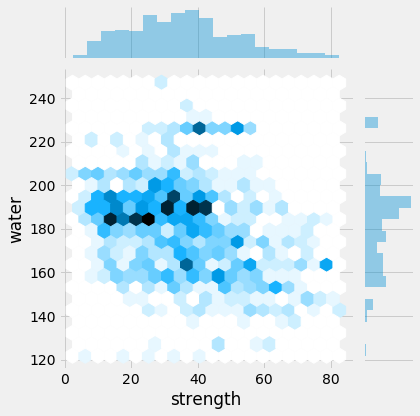

In [22]:
plt.figure(figsize=(12,6))
sns.jointplot(myData["strength"], myData["water"], kind="hex")
plt.show()

<Figure size 864x432 with 0 Axes>

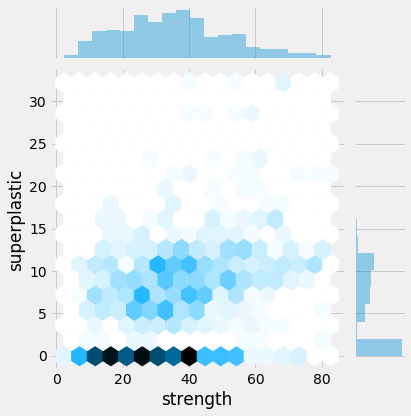

In [23]:
plt.figure(figsize=(12,6))
sns.jointplot(myData["strength"], myData["superplastic"], kind="hex")
plt.show()

<Figure size 864x432 with 0 Axes>

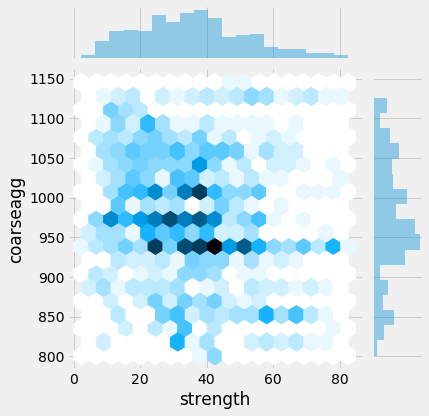

In [24]:
plt.figure(figsize=(12,6))
sns.jointplot(myData["strength"], myData["coarseagg"], kind="hex")
plt.show()

<Figure size 864x432 with 0 Axes>

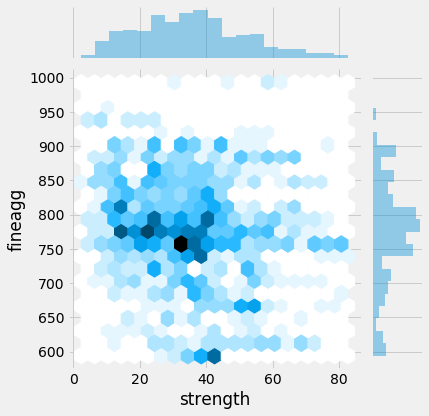

In [25]:
plt.figure(figsize=(12,6))
sns.jointplot(myData["strength"], myData["fineagg"], kind="hex")
plt.show()

<Figure size 864x432 with 0 Axes>

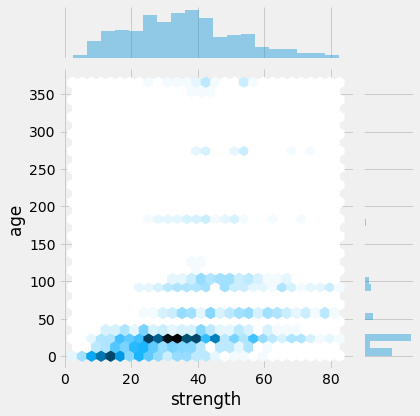

In [26]:
plt.figure(figsize=(12,6))
sns.jointplot(myData["strength"], myData["age"], kind="hex")
plt.show()

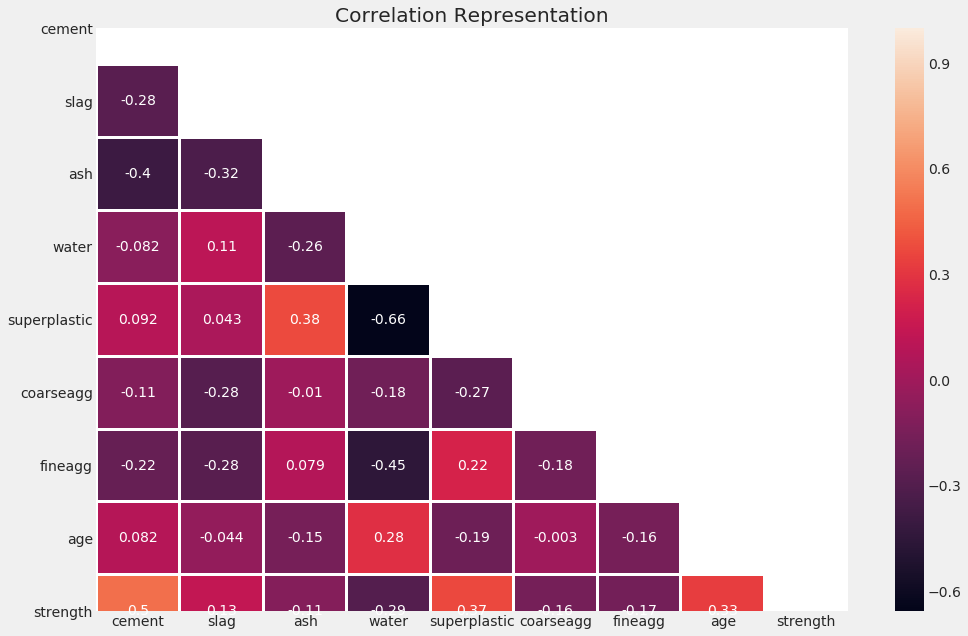

In [27]:
plt.figure(figsize = (15,10))

cor = myData.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    sns.heatmap(cor, annot = True, linewidth = 2, mask = mask)
    
plt.title('Correlation Representation')
plt.show()

### Observation :-
None of the features are highly inter correlated or correlated with the target variable.

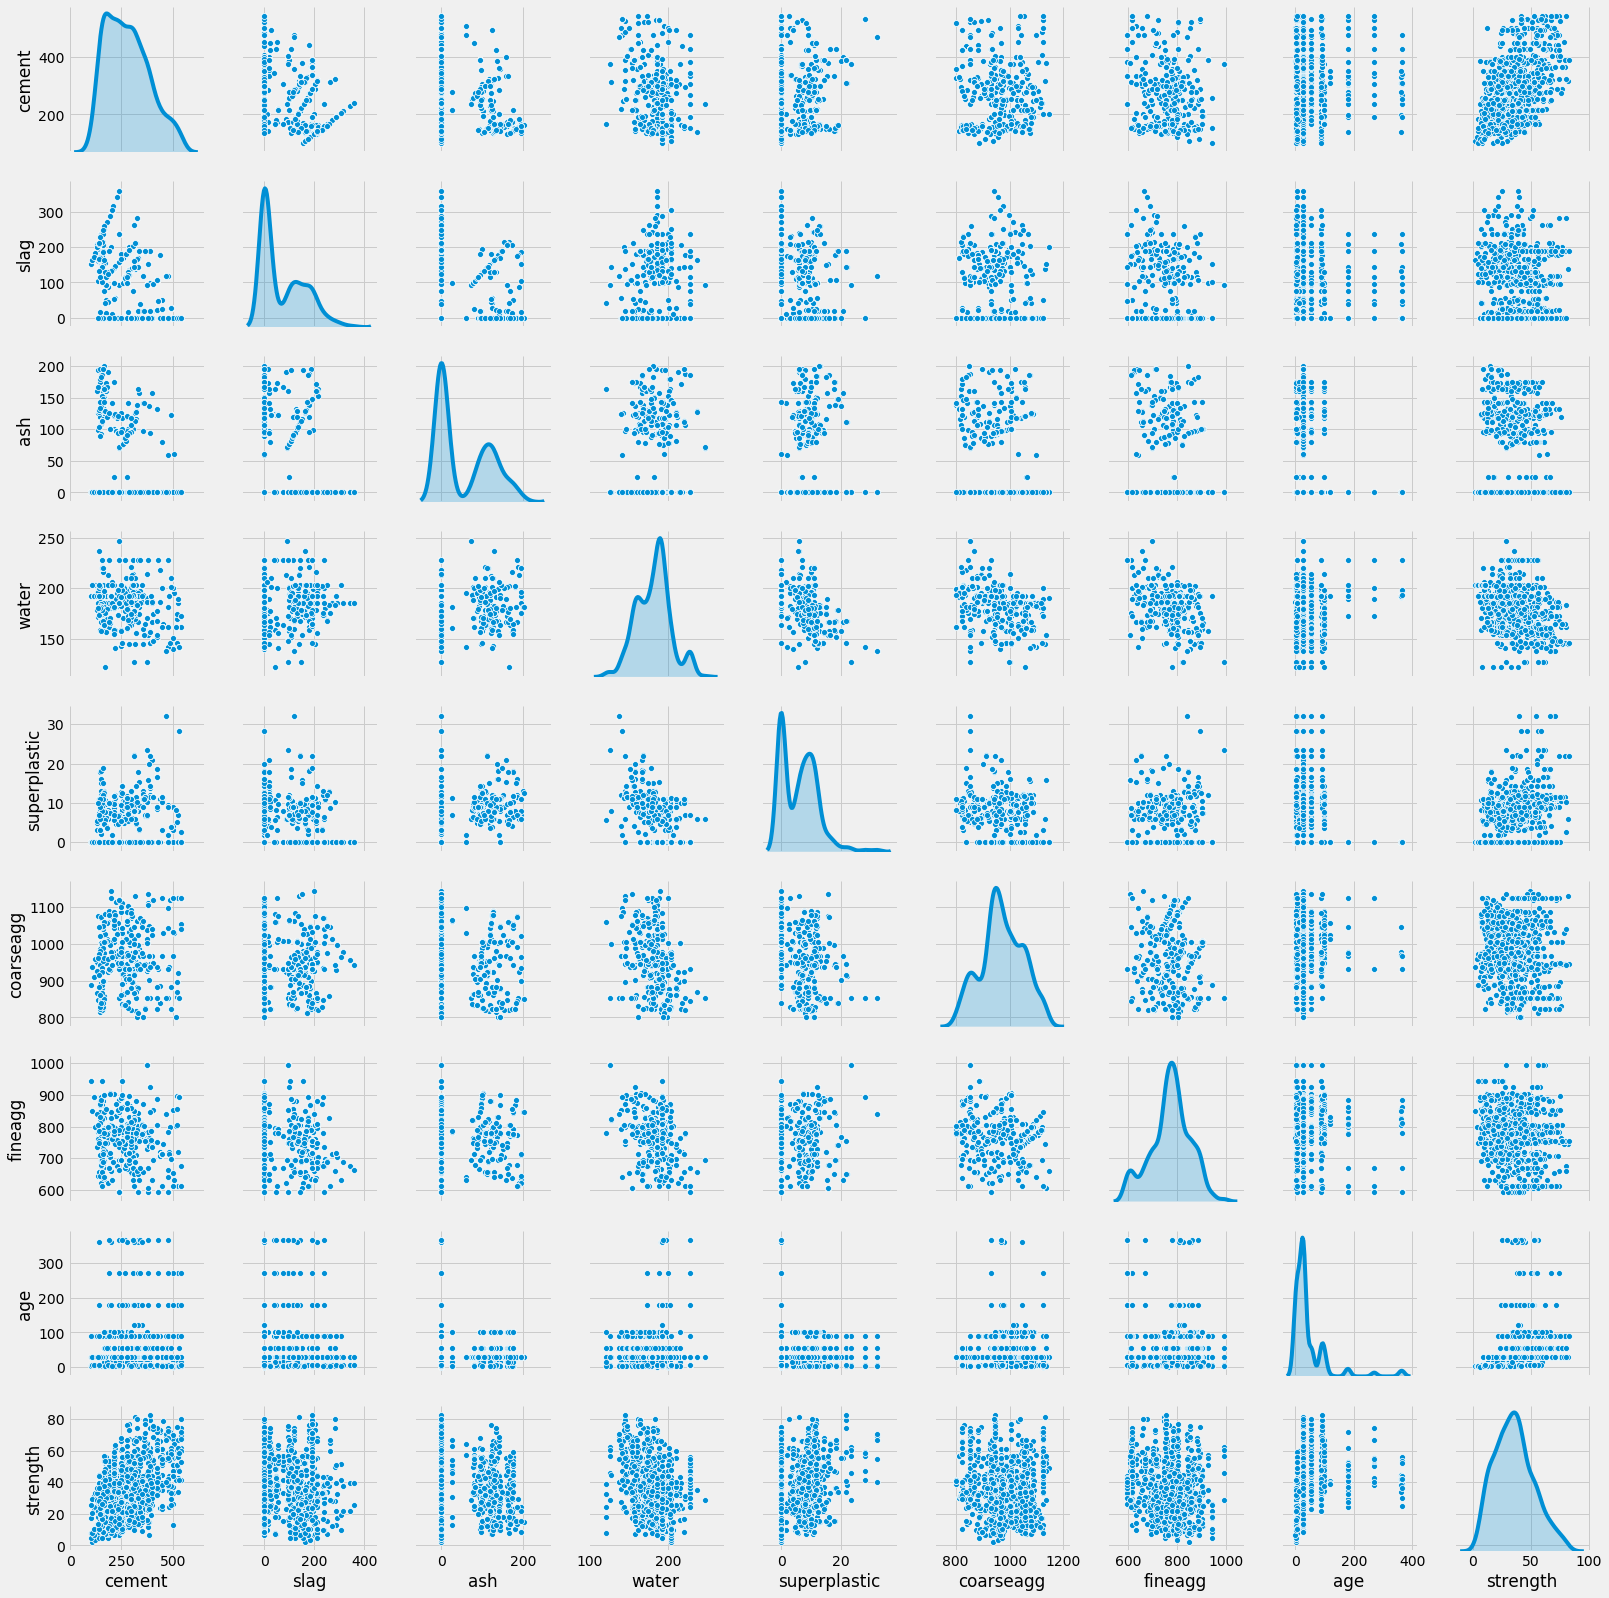

In [29]:
sns.pairplot(myData, diag_kind = 'kde')

Observing that cement is well related with strength and the other attributes are mostly forming clouds. None of the predictors by themselves seem to have a strong relation with the target.

### Data problem solving strategies <br>
There is no missing value or NULL values, hence skipping it and doing outlier treatment.

### Outlier details and treatment

In [30]:
def outliersValues(base_dataset):
    num_features=[col for col in base_dataset.select_dtypes(np.number).columns ]
    print("Outliers in Dataset ")
    print("====================")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print("Column ",cols,"\t has ",count," outliers")
        
outliersValues(myData)

Outliers in Dataset 
Column  cement 	 has  0  outliers
Column  slag 	 has  2  outliers
Column  ash 	 has  0  outliers
Column  water 	 has  9  outliers
Column  superplastic 	 has  10  outliers
Column  coarseagg 	 has  0  outliers
Column  fineagg 	 has  5  outliers
Column  age 	 has  59  outliers
Column  strength 	 has  4  outliers


In [31]:
def outliersDetails(myData):
    q1=myData.quantile(0.25)
    q3=myData.quantile(0.75)
    IQR=q3-q1
    cwo=((myData.iloc[:] <(q1-1.5*IQR))|(myData.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
    opdf=pd.DataFrame(cwo,index=myData.columns,columns=['No. of Outliers'])
    opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(myData),2)
    return opdf

outliersDetails(myData)

No. of Outliers  Percentage Outliers
cement                      0                 0.00
slag                        2                 0.19
ash                         0                 0.00
water                       9                 0.87
superplastic               10                 0.97
coarseagg                   0                 0.00
fineagg                     5                 0.49
age                        59                 5.73
strength                    4                 0.39

In [32]:
def outliers_transform_with_replace_mean(base_dataset):
    num_features=[col for col in base_dataset.select_dtypes(np.number).columns ]
    print("Outliers in Dataset before Treatment")
    print("====================================")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print("Column ",cols,"\t has ",count," outliers")
        
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        for p in x:
            if p <ltv or p>utv:
                y.append(np.mean(x))
            else:
                y.append(p)
        base_dataset[cols]=y
                
    print("\nOutliers in Dataset after Treatment")
    print("====================================")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print("Column ",cols,"\t has ",count," outliers")
        
outliers_transform_with_replace_mean(myData)

Outliers in Dataset before Treatment
Column  cement 	 has  0  outliers
Column  slag 	 has  2  outliers
Column  ash 	 has  0  outliers
Column  water 	 has  9  outliers
Column  superplastic 	 has  10  outliers
Column  coarseagg 	 has  0  outliers
Column  fineagg 	 has  5  outliers
Column  age 	 has  59  outliers
Column  strength 	 has  4  outliers

Outliers in Dataset after Treatment
Column  cement 	 has  0  outliers
Column  slag 	 has  0  outliers
Column  ash 	 has  0  outliers
Column  water 	 has  0  outliers
Column  superplastic 	 has  0  outliers
Column  coarseagg 	 has  0  outliers
Column  fineagg 	 has  30  outliers
Column  age 	 has  3  outliers
Column  strength 	 has  5  outliers


Now new outlier in "fineagg" , "age" and in "strength" attributes, I am going ignore new outlier

Since this is a regression problem with all numerical columns involved of different metrics, it will be better if we scale them."

### Preparing Data for Modelling 

In [136]:
#Target and independent variables
X = myData.drop('strength', axis = 1)
y = myData['strength']

print(X.shape)
print(y.shape)

(1030, 8)
(1030,)


### Linear Regression- OLS

In [137]:
import statsmodels.api as sm

ls=sm.OLS(y,sm.add_constant(X))
results=ls.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     344.3
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          9.74e-284
Time:                        13:46:32   Log-Likelihood:                -3672.7
No. Observations:                1030   AIC:                             7363.
Df Residuals:                    1021   BIC:                             7408.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           33.3426     18.809      1.773      0.077      -3.567      70.252
cement           0.1004      0.006     16.229      0.000       0.088       0.113
slag             0.0720      0.007      9.764      0.000       0.058       0.086
ash              0.0449      0.009      4.923      0.000       0.027       0.063
water           -0.1712      0.030     -5.648      0.000      -0.231      -0.112
superplastic     0.2498      0.085      2.927      0.004       0.082       0.417
coarseagg       -0.0060      0.007     -0.912      0.362      -0.019       0.007
fineagg         -0.0112      0.008     -1.462      0.144      -0.026       0.004
age              0.3155      0.010     32.798      0.000       0.297       0.334
==============================================================================
Omnibus:                       27.024   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.196
Skew:                           0.170   Prob(JB):                     2.08e-11
Kurtosis:                       4.015   Cond. No.                     9.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observation :-
Here we can see that the constant term is having P value greater than 0.05 viz. the assumed level of significance, thus we remove the constant term from modelling

In [138]:
ls=sm.OLS(y,X)
results=ls.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               strength   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              2553.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
Time:                        13:46:41   Log-Likelihood:                         -3674.3
No. Observations:                1030   AIC:                                      7365.
Df Residuals:                    1022   BIC:                                      7404.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cement           0.1096      0.003     32.446      0.000       0.103       0.116
slag             0.0826      0.004     18.929      0.000       0.074       0.091
ash              0.0559      0.007      8.322      0.000       0.043       0.069
water           -0.1229      0.013     -9.240      0.000      -0.149      -0.097
superplastic     0.3073      0.079      3.888      0.000       0.152       0.462
coarseagg        0.0048      0.003      1.864      0.063      -0.000       0.010
fineagg          0.0014      0.003      0.496      0.620      -0.004       0.007
age              0.3149      0.010     32.720      0.000       0.296       0.334
==============================================================================
Omnibus:                       28.114   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.428
Skew:                           0.170   Prob(JB):                     4.12e-12
Kurtosis:                       4.051   Cond. No.                         384.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation :-
Without the constant term we can observe that the R-squared value has increased drastically.<br>
P value for coarseagg and fineagg greater than 0.05 so we can drop these columns in modeling

In [139]:
X_drop = myData.drop(['fineagg','coarseagg','strength'], axis =1)

print(X_drop.shape)

(1030, 6)


In [140]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled, columns = X.columns)

X=X_scaled
X.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.625292 -0.847144  1.062459     -1.090842  -0.014398 -0.305317   
1 -1.074790 -0.365026  1.096078 -1.132696      0.881980   1.388141  0.301063   
2 -0.298384 -0.859675  0.648965  0.280557     -0.086164  -0.206121  1.127367   
3 -0.145209  0.476581 -0.847144  2.252311     -1.090842  -0.526517 -1.303237   
4 -1.209776  1.290056 -0.847144  0.567092      0.571443   0.958372 -0.963817   

        age  
0 -0.188562  
1 -0.689672  
2 -0.188562  
3 -0.188562  
4 -0.188562

In [142]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X_drop)
X_drop_scaled = pd.DataFrame(scaled, columns = X_drop.columns)

X_drop=X_drop_scaled
X_drop.head()

cement      slag       ash     water  superplastic       age
0 -1.339017  1.625292 -0.847144  1.062459     -1.090842 -0.188562
1 -1.074790 -0.365026  1.096078 -1.132696      0.881980 -0.689672
2 -0.298384 -0.859675  0.648965  0.280557     -0.086164 -0.188562
3 -0.145209  0.476581 -0.847144  2.252311     -1.090842 -0.188562
4 -1.209776  1.290056 -0.847144  0.567092      0.571443 -0.188562

### Spliting data into Train and Test 

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

### Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


lr=LinearRegression()
lr.fit(X_train,y_train)

print('Test Accuracy: %.3f' % lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % lr.score(X_test, y_test))
print("\n")

y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)

from sklearn.metrics import r2_score

print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))

Test Accuracy: 0.731
Test Accuracy: 0.723


Train R2 score:  0.7306258654999094
Test R2 score:  0.7225038327424547


### Initiating model comparison dataframe

In [145]:
col_names =  ['Model Type', 'Training Score', 'Test Score']
model_comparison  = pd.DataFrame(columns = col_names)
model_comparison

Empty DataFrame
Columns: [Model Type, Training Score, Test Score]
Index: []

In [146]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression', round(lr.score(X_train, y_train)*100,2), round(lr.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0  Linear Regression           73.06       72.25

### Polynomial Regression - Degree 2

In [147]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)

X_polytr = pf.fit_transform(X_train)

lrp2=LinearRegression()
lrp2.fit(X_polytr,y_train)

X_polyte = pf.fit_transform(X_test)

y_pred_lr2te = lrp2.predict(X_polyte)
y_pred_lr2tr = lrp2.predict(X_polytr)


print('Test Accuracy: %.3f' % lrp2.score(X_polytr, y_train))
print('Test Accuracy: %.3f' % lrp2.score(X_polyte, y_test))
print("\n")


print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Test Accuracy: 0.859
Test Accuracy: 0.834


Training R2 - degree 2 polynomial:  0.8593522907606325
Test R2 - degree 2 polynomial:  0.8337884638208138


In [148]:
model_comparison.loc[len(model_comparison)] = 'Regression (Ploynomial = 2)', round(lrp2.score(X_polytr, y_train)*100,2), round(lrp2.score(X_polyte, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0            Linear Regression           73.06       72.25
1  Regression (Ploynomial = 2)           85.94       83.38

### Polynomial Regression - Degree 3

In [149]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 3)

X_polytr = pf.fit_transform(X_train)

lrp3=LinearRegression()
lrp3.fit(X_polytr,y_train)

X_polyte = pf.fit_transform(X_test)

y_pred_lr3te = lrp3.predict(X_polyte)
y_pred_lr3tr = lrp3.predict(X_polytr)


print('Test Accuracy: %.3f' % lrp3.score(X_polytr, y_train))
print('Test Accuracy: %.3f' % lrp3.score(X_polyte, y_test))
print("\n")


print("Training R2 - degree 3 polynomial: ",r2_score(y_train, y_pred_lr3tr ))
print("Test R2 - degree 3 polynomial: ",r2_score(y_test,y_pred_lr3te))

Test Accuracy: 0.930
Test Accuracy: 0.878


Training R2 - degree 3 polynomial:  0.9295608106746949
Test R2 - degree 3 polynomial:  0.8784694904291919


In [150]:
model_comparison.loc[len(model_comparison)] = 'Regression (Ploynomial = 3)', round(lrp3.score(X_polytr, y_train)*100,2), round(lrp3.score(X_polyte, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0            Linear Regression           73.06       72.25
1  Regression (Ploynomial = 2)           85.94       83.38
2  Regression (Ploynomial = 3)           92.96       87.85

### Linear Regression through pipeline

In [151]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline 

pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LinearRegression())]) 
pipe_lr.fit(X_train, y_train) 

print('Test Accuracy: %.3f' % pipe_lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.731
Test Accuracy: 0.723


In [152]:
# Finding out the importance of features

feature_importances = lr.coef_.ravel()
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[10.17352725  5.58828221  2.90698577 -3.66848899  1.26812548 -0.62064149
 -0.9015644   8.88335042]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

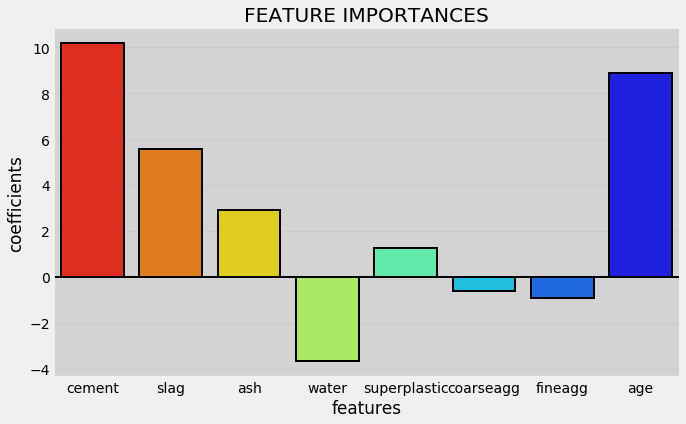

In [153]:
# Plotting the feature importance metric for better visualisation

plt.figure(figsize=(10,6))
coef = pd.DataFrame(lr.coef_.ravel())
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
        linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [154]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error(RMSE) :\t {} \nThe R^2 error(RSE) :\t {}".format(rms,r2Score))

The Root Mean Sq Error(RMSE) :	 8.542955009151612 
The R^2 error(RSE) :	 0.7225038327424547


In [155]:
b1 = lr.coef_
b0 = lr.intercept_
print("b1 is: {} and b0 is: {}".format(b1, b0))

b1 is: [10.17352725  5.58828221  2.90698577 -3.66848899  1.26812548 -0.62064149
 -0.9015644   8.88335042] and b0 is: 35.65789796829269


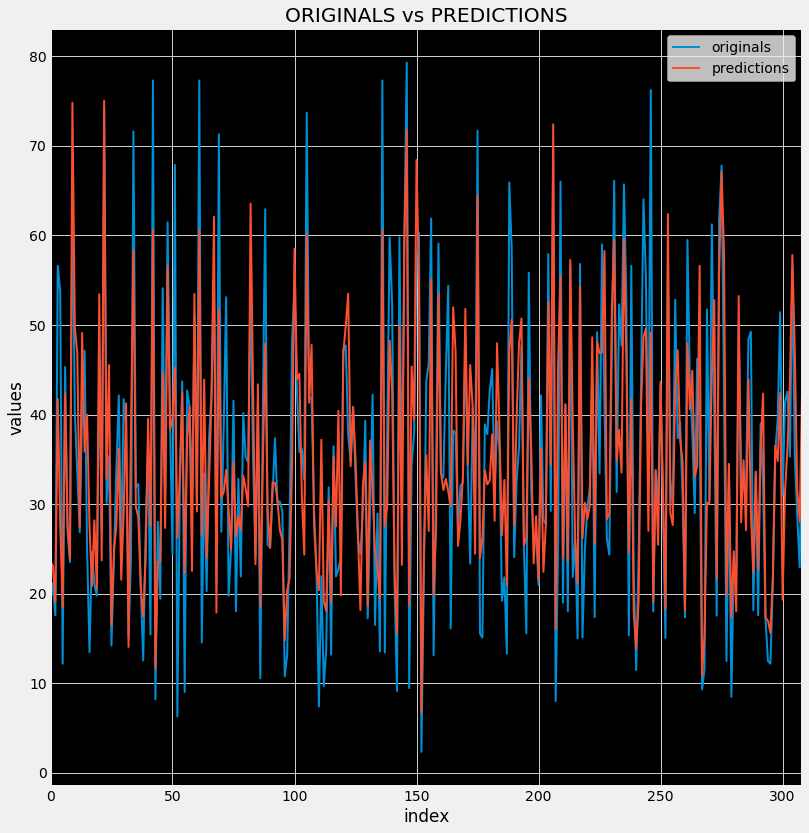

In [156]:
prediction = lr.predict(X_test)
prediction = pd.DataFrame(prediction)

plt.figure(figsize = (10,10))
    
y_test = y_test.reset_index()['strength']
    
ax = y_test.plot(label = 'originals', figsize = (12,13), linewidth = 2)
ax = prediction[0].plot(label = 'predictions', figsize = (12,13), linewidth = 2)
plt.legend(loc = 'best')
plt.title('ORIGINALS vs PREDICTIONS')
plt.xlabel('index')
plt.ylabel('values')
ax.set_facecolor('k')

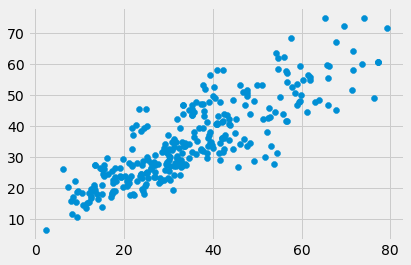

In [157]:
y_pred = lr.predict(X_test)
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

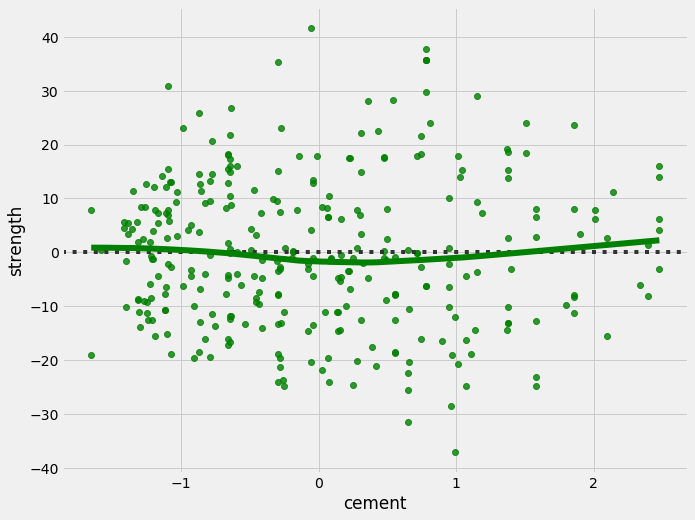

In [158]:
# Is OLS a good model ? Should we building a simple linear model ? Check the residuals for few predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['cement'], y= y_test, color='green', lowess=True )

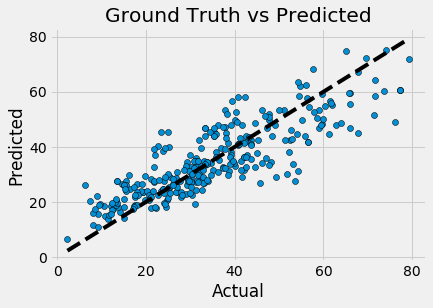

In [159]:
y_pred = lr.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [160]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

cement      slag       ash     water  superplastic  coarseagg  \
772 -0.661217 -0.859675  1.053868 -0.064257     -0.049630   1.089619   
997 -1.121700  1.050936  1.153921  0.746784      0.370508  -0.153365   
724  0.959567 -0.859675 -0.847144  0.197996     -1.090842   1.694384   
167 -1.041283 -0.700262  1.848041 -1.205544     -0.341900   0.429525   
764 -1.246155 -0.859675  2.045021 -0.710177      1.831857   1.300643   

      fineagg       age  strength  
772  0.086224 -0.689672     20.92  
997 -1.671896 -0.188562     27.23  
724  0.149786 -0.188562     22.49  
167  1.066348  2.388579     37.68  
764 -1.201538 -0.188562     13.46

In [161]:
lm1 = smf.ols(formula= 'strength ~ cement + slag + ash + superplastic + fineagg + age', data = data_train).fit()
lm1.params
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     299.1
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          5.00e-191
Time:                        13:48:54   Log-Likelihood:                -2593.4
No. Observations:                 721   AIC:                             5201.
Df Residuals:                     714   BIC:                             5233.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.6680      0.331    107.877   

### Linear Regression with dropped columns

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size = 0.3, random_state = 11)

In [163]:
lr_drop = LinearRegression()
lr_drop.fit(X_train, y_train)

print("Train Accuracy :\t",lr_drop.score(X_train, y_train))
print("Test  Accuracy :\t",lr_drop.score(X_test, y_test))

Train Accuracy :	 0.7365983158416629
Test  Accuracy :	 0.7000254866390567


In [164]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression (Column Drop)', round(lr_drop.score(X_train, y_train)*100,2), round(lr_drop.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           73.06       72.25
1      Regression (Ploynomial = 2)           85.94       83.38
2      Regression (Ploynomial = 3)           92.96       87.85
3  Linear Regression (Column Drop)           73.66       70.00

Score drops when manually dropping 2 least correlated columns.

###  Linear Regression with PCA

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [168]:
# Performing PCA with all components first

pca = PCA(n_components = 8)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [169]:
print(pca.explained_variance_)

[2.13040199 1.48190191 1.2533571  1.04709244 0.9894912  0.88758472
 0.16809862 0.03828776]


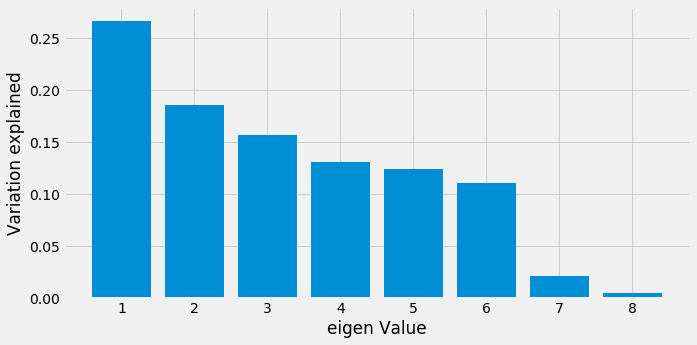

In [170]:
# Finding out the importance of features

plt.figure(figsize = (10,5))
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,tick_label=range(1,9), align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

Usig elbow method to see the number of features that can explain more than 95% of the output

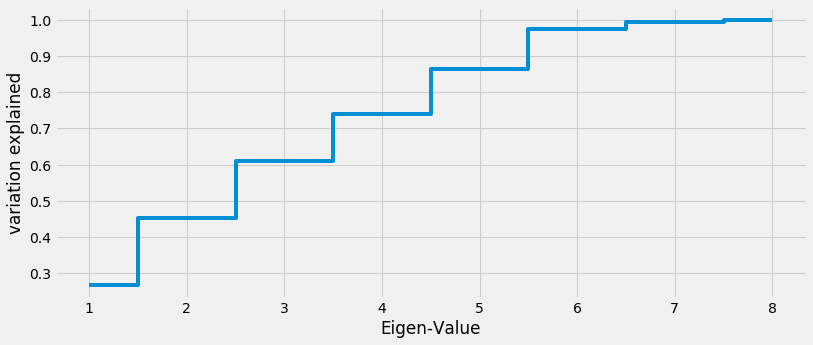

In [171]:
plt.figure(figsize = (12,5))
plt.xticks(np.arange(0,9))
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('variation explained')
plt.xlabel('Eigen-Value')
plt.show()

From the elbow method we found out 6 features are enough. PCA seemed not that much effective though in this case.

#### Running Linear Regression with 6 important features

In [172]:
pca6 = PCA(n_components = 6)
pca6.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [173]:
Xpca6 = pca6.fit_transform(X)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6,y, test_size = 0.3, random_state = 11)

In [175]:
lr_pca6 = LinearRegression()
lr_pca6.fit(X_train, y_train)

print("Train Accuracy :\t",lr_pca6.score(X_train, y_train))
print("Test  Accuracy :\t",lr_pca6.score(X_test, y_test))

Train Accuracy :	 0.7153550121584041
Test  Accuracy :	 0.6533596774855723


In [176]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression with PCA', round(lr_pca6.score(X_train, y_train)*100,2), round(lr_pca6.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           73.06       72.25
1      Regression (Ploynomial = 2)           85.94       83.38
2      Regression (Ploynomial = 3)           92.96       87.85
3  Linear Regression (Column Drop)           73.66       70.00
4       Linear Regression with PCA           71.54       65.34

PCA did not elevate the score, instead the score is dropped by neglecting only 2 columns. PCA is performing fine.

##  Ridge Regression

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

###  Normal Ridge

In [178]:
ridge = Ridge(alpha = 0.3,random_state = 11)

ridge.fit(X_train, y_train)

print ("Ridge model:", (ridge.coef_),"\n")   

print("Train Accuracy :\t",ridge.score(X_train, y_train))
print("Test  Accuracy :\t",ridge.score(X_test, y_test))

Ridge model: [10.86143651  5.99198614  2.307804   -3.38552508  2.03521961 -0.5906095
 -0.96023586  8.59916394] 

Train Accuracy :	 0.7371855032148227
Test  Accuracy :	 0.7003040835433423


Feature Importance

In [179]:
feature_importances = ridge.coef_.ravel()
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[10.86143651  5.99198614  2.307804   -3.38552508  2.03521961 -0.5906095
 -0.96023586  8.59916394]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

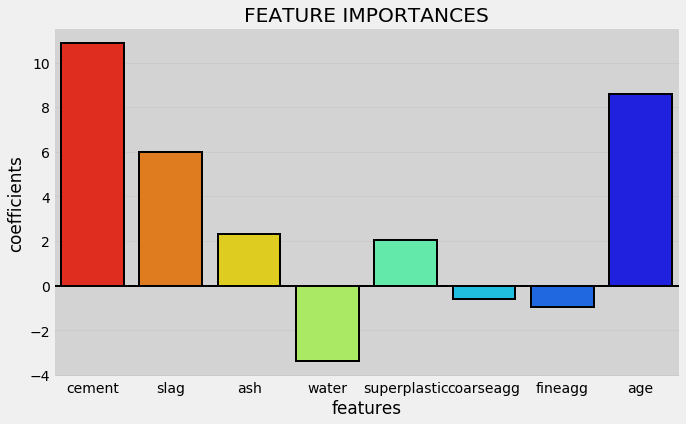

In [180]:
plt.figure(figsize=(10,6))
coef = pd.DataFrame(ridge.coef_.ravel())
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
        linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [181]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           73.06       72.25
1      Regression (Ploynomial = 2)           85.94       83.38
2      Regression (Ploynomial = 3)           92.96       87.85
3  Linear Regression (Column Drop)           73.66       70.00
4       Linear Regression with PCA           71.54       65.34
5                 Ridge Regression           73.72       70.03

Using Ridge does not improve much score either.

###  Ridge after dropping columns

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size = 0.3, random_state = 11)

In [183]:
ridge = Ridge(alpha = 0.3,random_state = 11)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_),"\n")

print("Train Accuracy :\t",ridge.score(X_train, y_train))
print("Test  Accuracy :\t",ridge.score(X_test, y_test))

Ridge model: [11.71081011  6.78479689  2.97783683 -2.61776896  2.13478191  8.56161308] 

Train Accuracy :	 0.7365978588247122
Test  Accuracy :	 0.700057083130885


In [184]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression (Column Drop)', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           73.06       72.25
1      Regression (Ploynomial = 2)           85.94       83.38
2      Regression (Ploynomial = 3)           92.96       87.85
3  Linear Regression (Column Drop)           73.66       70.00
4       Linear Regression with PCA           71.54       65.34
5                 Ridge Regression           73.72       70.03
6   Ridge Regression (Column Drop)           73.66       70.01

Dropping columns for Ridge did not improve score as per dropping 2 features

###  Ridge with PCA

In [185]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [186]:
ridge = Ridge(alpha = 0.3,random_state = 11)
ridge.fit(X_train, y_train)

print ("Ridge model:", (ridge.coef_),"\n")   

print("Train Accuracy :\t",ridge.score(X_train, y_train))
print("Test  Accuracy :\t",ridge.score(X_test, y_test))

Ridge model: [-1.20745362  1.45269434  8.46994829  2.04035681  9.93455188 -1.94935173] 

Train Accuracy :	 0.7153549019793177
Test  Accuracy :	 0.6534318567039381


In [187]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression with PCA', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           73.06       72.25
1      Regression (Ploynomial = 2)           85.94       83.38
2      Regression (Ploynomial = 3)           92.96       87.85
3  Linear Regression (Column Drop)           73.66       70.00
4       Linear Regression with PCA           71.54       65.34
5                 Ridge Regression           73.72       70.03
6   Ridge Regression (Column Drop)           73.66       70.01
7        Ridge Regression with PCA           71.54       65.34

##  Lasso Regression

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [189]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train,y_train)

print ("Lasso model:", (lasso.coef_),"\n")

print("Train Accuracy :\t",lasso.score(X_train, y_train))
print("Test  Accuracy :\t",lasso.score(X_test, y_test))

Lasso model: [10.50396617  5.64545515  1.90266442 -3.23799451  2.25367776 -0.56943445
 -0.97232015  8.48447719] 

Train Accuracy :	 0.7367447989202354
Test  Accuracy :	 0.7004004413042215


Feature Importance

In [190]:
feature_importances = lasso.coef_.ravel()
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[10.50396617  5.64545515  1.90266442 -3.23799451  2.25367776 -0.56943445
 -0.97232015  8.48447719]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

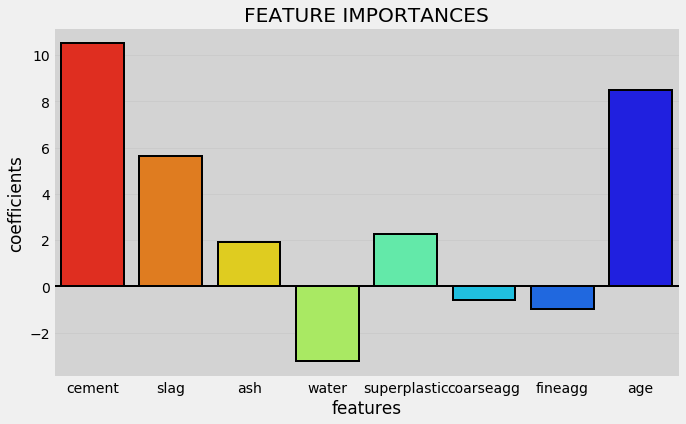

In [191]:
plt.figure(figsize=(10,6))
coef = pd.DataFrame(lasso.coef_.ravel())
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
        linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [192]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           73.06       72.25
1      Regression (Ploynomial = 2)           85.94       83.38
2      Regression (Ploynomial = 3)           92.96       87.85
3  Linear Regression (Column Drop)           73.66       70.00
4       Linear Regression with PCA           71.54       65.34
5                 Ridge Regression           73.72       70.03
6   Ridge Regression (Column Drop)           73.66       70.01
7        Ridge Regression with PCA           71.54       65.34
8                 Lasso Regression           73.67       70.04

###  Lasso by dropping columns

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y_drop, test_size = 0.3, random_state = 11)

In [195]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train,y_train)

print ("Lasso model:", (lasso.coef_),"\n")

print("Train Accuracy :\t",lasso.score(X_train, y_train))
print("Test  Accuracy :\t",lasso.score(X_test, y_test))

Lasso model: [0.11056009 0.07283169 0.0386214  0.75174582 0.30343319] 

Train Accuracy :	 0.7235940752423508
Test  Accuracy :	 0.6764019558803198


In [196]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression (Column Drop)', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           73.06       72.25
1      Regression (Ploynomial = 2)           85.94       83.38
2      Regression (Ploynomial = 3)           92.96       87.85
3  Linear Regression (Column Drop)           73.66       70.00
4       Linear Regression with PCA           71.54       65.34
5                 Ridge Regression           73.72       70.03
6   Ridge Regression (Column Drop)           73.66       70.01
7        Ridge Regression with PCA           71.54       65.34
8                 Lasso Regression           73.67       70.04
9   Lasso Regression (Column Drop)           72.36       67.64

Atleast Lasso Peformed better by dropping 3 columns than Ridge

###  Lasso with PCA

In [197]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [198]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_),"\n")

print("Train Accuracy :\t",lasso.score(X_train, y_train))
print("Test  Accuracy :\t",lasso.score(X_test, y_test))

Lasso model: [-1.15811641  1.38151235  8.389855    1.9327805   9.82997367 -1.83328677] 

Train Accuracy :	 0.7151571625640744
Test  Accuracy :	 0.6560680445003781


In [199]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression with PCA', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                 Linear Regression           73.06       72.25
1       Regression (Ploynomial = 2)           85.94       83.38
2       Regression (Ploynomial = 3)           92.96       87.85
3   Linear Regression (Column Drop)           73.66       70.00
4        Linear Regression with PCA           71.54       65.34
5                  Ridge Regression           73.72       70.03
6    Ridge Regression (Column Drop)           73.66       70.01
7         Ridge Regression with PCA           71.54       65.34
8                  Lasso Regression           73.67       70.04
9    Lasso Regression (Column Drop)           72.36       67.64
10        Lasso Regression with PCA           71.52       65.61

##  Polynomial Features :  Ridge and Lasso Regression

####  Ridge Regression - Ploynomial Degree 2

In [200]:
ridge_poly2 = Ridge(alpha = 0.3)
ridge_poly2.fit(X_train, y_train)
print ("Ridge model:", (ridge_poly2.coef_)) 

Ridge model: [-1.20745362  1.45269434  8.46994829  2.04035681  9.93455188 -1.94935173]


In [202]:
print("Train Accuracy :\t",ridge_poly2.score(X_train, y_train))
print("Test  Accuracy :\t",ridge_poly2.score(X_test, y_test))

Train Accuracy :	 0.7153549019793177
Test  Accuracy :	 0.6534318567039381


In [203]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression (Polynomial = 2)', round(ridge_poly2.score(X_train, y_train)*100,2), round(ridge_poly2.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34

####  Lasso Regression Polynomial Degree 2

In [204]:
lasso_poly2 = Lasso(alpha=0.01)
lasso_poly2.fit(X_train,y_train)
print ("Lasso model:", (lasso_poly2.coef_))

Lasso model: [-1.2027443   1.4460577   8.46455175  2.03051816  9.92793626 -1.93864639]


In [205]:
print("Train Accuracy :\t",lasso_poly2.score(X_train, y_train))
print("Test  Accuracy :\t",lasso_poly2.score(X_test, y_test))

Train Accuracy :	 0.715353033696227
Test  Accuracy :	 0.6536529443695327


In [206]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression (Polynomial = 2)', round(lasso_poly2.score(X_train, y_train)*100,2), round(lasso_poly2.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37

###  Polynomial Degree = 3

In [207]:
poly = PolynomialFeatures(degree = 3, interaction_only = True)

In [208]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=11)

####  Ridge Regression

In [209]:
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_)) 

Ridge model: [ 0.         11.19584373  6.36313472  2.56507382 -4.64788092 -0.52078656
 -1.46976391 -0.59096025  8.79283019 -0.65416748  1.58467908 -2.31592396
  0.03975833 -0.50456605  2.72374656  0.50630651  1.5427609  -2.58593159
 -2.34397032 -2.10705835  0.64676924  2.11589544 -3.11985043 -4.89977816
 -0.86120908 -0.0279194   1.60666229 -0.8361564  -4.25960028 -0.71998817
 -2.69362071 -1.00306896  0.89016661 -1.42877399 -0.9162584  -0.04897744
 -0.91883204 -0.97040089 -0.54819235 -1.15755158 -2.7848239  -0.23077379
  0.56245522 -0.39638427 -2.05819773 -1.75110107 -1.22824047  1.34522385
  1.31901994  1.00393636  1.80243004  0.94413549  1.37771921  1.54290244
 -1.8916309  -1.07432187 -1.06174169  0.16998873 -1.05110968 -3.26202314
 -0.95388949 -0.76930053 -0.96280204  1.02213516 -0.87889782  2.5838548
  0.22240968 -1.12984536  0.66053288 -0.68496081 -1.00738547  0.42252356
  0.60865093 -0.80169255  0.61110461 -0.05292984  1.30802775 -1.98317992
 -0.31779159  1.10725054 -2.1939137  -1

In [211]:
print("Train Accuracy :\t",ridge.score(X_train, y_train))
print("Test  Accuracy :\t",ridge.score(X_test, y_test))

Train Accuracy :	 0.8463637686187592
Test  Accuracy :	 0.6327071628735625


In [212]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression (Polynomial = 3)', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27

### Lasso Regression Polynomial Degree 3

In [213]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  1.14719494e+01  6.80649846e+00  3.13573874e+00
 -3.67317751e+00  9.57485670e-02 -1.09460782e+00 -0.00000000e+00
  8.53947492e+00 -3.98590430e-01  1.44057399e+00 -1.91858218e+00
  6.44071388e-01 -1.89116846e-01  2.76481390e+00  2.48656052e-01
  1.38736522e+00 -1.50725416e+00 -1.17042186e+00 -1.59603900e+00
  1.25284488e+00  1.62091275e+00 -2.51471102e+00 -3.79073885e+00
 -8.10425482e-01 -0.00000000e+00  1.13448743e+00 -4.74103577e-01
 -3.88132793e+00 -6.31062445e-01 -2.32045423e+00 -4.86160890e-01
  1.44514815e+00 -7.51055170e-01 -5.48467947e-01  0.00000000e+00
 -9.56400450e-01 -6.94968368e-01 -1.68206954e-02 -9.44755051e-01
 -2.42638588e+00  3.83694414e-02  8.63952446e-02  0.00000000e+00
 -1.60634419e+00 -1.27697885e+00 -9.94995141e-01  8.83322439e-01
  1.24366360e+00  1.04484799e+00  1.66898006e+00  6.62530740e-01
  1.16314145e+00  1.34896068e+00 -1.38848427e+00 -8.55993334e-01
 -8.96582433e-01  7.19955367e-02 -1.36320395e-01 -2.47615745e+00
 -4.95501670

In [214]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8454833348439195
0.6693085811398175


In [215]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression (Polynomial = 3)', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93

##  Decision Tree Regressor

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [217]:
dt_model = DecisionTreeRegressor(criterion='mse', random_state = 11)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=11, splitter='best')

In [219]:
print("Train Accuracy :\t",dt_model.score(X_train, y_train))
print("Test  Accuracy :\t",dt_model.score(X_test, y_test))

Train Accuracy :	 0.9942490070961444
Test  Accuracy :	 0.7400633935899807


In [220]:
y_pred = dt_model.predict(X_test)

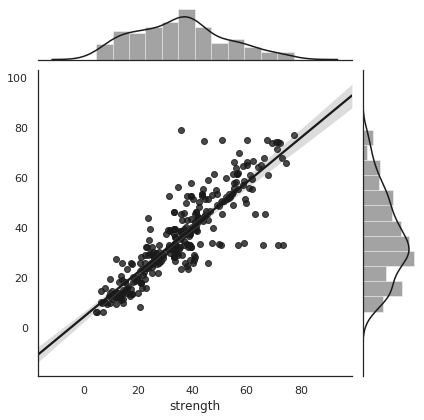

In [221]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [222]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Regressor', round(dt_model.score(X_train, y_train)*100,2), round(dt_model.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01

Feature Importance

In [223]:
feature_importances = dt_model.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.37948745 0.102888   0.01212442 0.12501059 0.02036745 0.0289883
 0.03665843 0.29447537]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

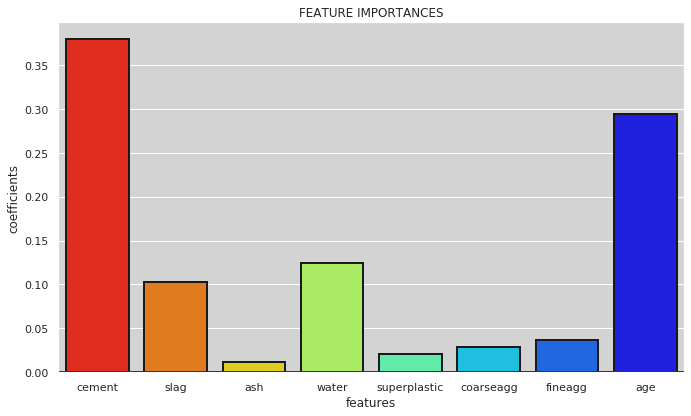

In [224]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(dt_model.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

###  Decision Tree Regressor with Hyper Parameter Tuning and dropping columns

Dropping the least correlated columns as per above graph

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size = 0.3, random_state = 11)

In [226]:
dt_model = DecisionTreeRegressor(criterion='mse', max_depth = 9, min_samples_split = 5, random_state = 11)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=11, splitter='best')

In [227]:
print("Train Accuracy :\t",dt_model.score(X_train, y_train))
print("Test  Accuracy:\t",dt_model.score(X_test, y_test))

Train Accuracy :	 0.9511224319427507
Test  Accuracy:	 0.8053829038235617


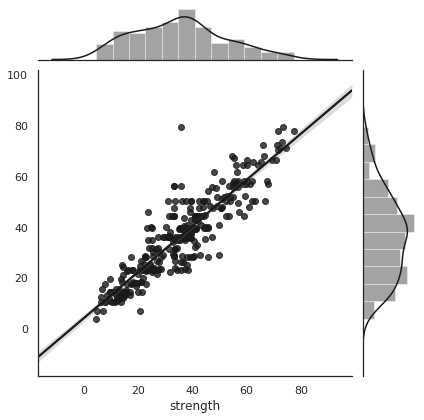

In [228]:
y_pred = dt_model.predict(X_test)
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [229]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Regressor (Tuned)', round(dt_model.score(X_train, y_train)*100,2), round(dt_model.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54

### 5.3 Decision Tree Regressor with PCA

In [230]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [231]:
parameters = { 'criterion': ['mse'],
 'max_depth': [3,4,5,6,7,8,9,10],
 'min_samples_split': [3,4,5,6,7,8,9,10]}
dtr_cv = GridSearchCV(DecisionTreeRegressor(), param_grid = parameters, cv = 10)

In [232]:
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch

In [234]:
print("Train Accuracy :\t",dtr_cv.score(X_train, y_train))
print("Test  Accuracy :\t",dtr_cv.score(X_test, y_test))

Train Accuracy :	 0.9230555590410253
Test  Accuracy :	 0.6818644077313878


In [235]:
dtr_cv.best_params_

{'criterion': 'mse', 'max_depth': 8, 'min_samples_split': 9}

In [236]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Regressor with PCA', round(dtr_cv.score(X_train, y_train)*100,2), round(dtr_cv.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19

### Model Performance at 95% confidence level

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [242]:
dt_model = DecisionTreeRegressor(criterion='mse', max_depth = 9, min_samples_split = 5, random_state = 11)

In [243]:
seed = 11
results = cross_val_score(dt_model, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.7431894  0.37939764 0.87533103 0.54149205 0.77165157 0.74330562
 0.27860411 0.43694375 0.75216861 0.58917327 0.78397453 0.62526465
 0.7101978  0.12084028 0.88197688 0.64778204 0.23782405 0.88967757
 0.57419607 0.65243943]
Accuracy: 61.177% (21.509%)


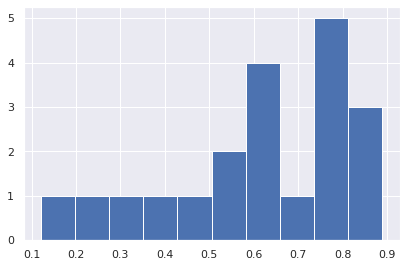

95.0 confidence interval 17.6% and 88.6%


In [244]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

##  K Nearest Regressor

###  Normal KN regressor

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [249]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [250]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8525644722850272
0.7211467768391377


In [251]:
model_comparison.loc[len(model_comparison)] = 'KNN Regressor', round(knn.score(X_train, y_train)*100,2), round(knn.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11

###  K Nearest Regressor with Hyper Parameter Tuning

In [252]:
parameters = { 'n_neighbors': [2,3,4,6],
 'weights': ['uniform', 'distance']}
knn_cv = GridSearchCV(KNeighborsRegressor(), param_grid = parameters, cv = 10)

In [253]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 6],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [254]:
knn_cv.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [255]:
print(knn_cv.score(X_train, y_train))
print(knn_cv.score(X_test, y_test))

0.9942490070961444
0.7801534524229821


In [256]:
model_comparison.loc[len(model_comparison)] = 'KNN Regressor Tuned', round(knn.score(X_train, y_train)*100,2), round(knn.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11

In [257]:
y_pred = knn_cv.predict(X_test)

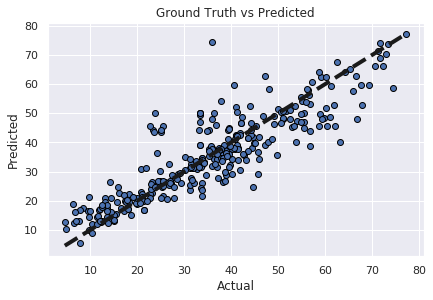

In [258]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### K Nearest Regressor with PCA

In [259]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [260]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [262]:
print("Train Accuracy :\t",knn.score(X_train, y_train))
print("Test  Accuracy :\t",knn.score(X_test, y_test))

Train Accuracy :	 0.8505086047436528
Test  Accuracy :	 0.7121519828583491


In [263]:
model_comparison.loc[len(model_comparison)] = 'KNN Regressor with PCA', round(knn.score(X_train, y_train)*100,2), round(knn.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22

### Model Performance at 95% confidence level

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [265]:
knn = KNeighborsRegressor(n_neighbors= 6, weights= 'distance')

In [266]:
results = cross_val_score(knn, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.85348227 0.72750937 0.72947769 0.69984279 0.76952238 0.70735097
 0.37714464 0.64488163 0.69177908 0.60995126 0.85868623 0.75361857
 0.74051928 0.40783792 0.83437816 0.57671927 0.19405564 0.95173361
 0.63961387 0.70865753]
Accuracy: 67.384% (17.367%)


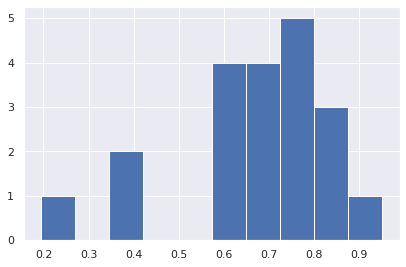

95.0 confidence interval 28.1% and 90.8%


In [267]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

##  Support Vector Regressor

###  Normal Support Vector Regression

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [269]:
svr = SVR()
svr.fit(X_train, y_train)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [270]:
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.7367873556762816
0.703263308017446


In [271]:
model_comparison.loc[len(model_comparison)] = 'SVR', round(svr.score(X_train, y_train)*100,2), round(svr.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33

###  Support Vector Ressor with Hyper Parameter Tuning

In [272]:
parameters = {'kernel': ['rbf', 'poly', 'linear'], 'C': list(range(1,100,5)), 'gamma':['auto']}
svrgs = GridSearchCV(SVR(), param_grid = parameters, cv = 10)

In [273]:
svrgs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61,
                               66, 71, 76, 81, 86, 91, 96],
                         'gamma': ['auto'],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [274]:
print("Train Accuracy :\t",svrgs.score(X_train, y_train))
print("Test  Accuracy :\t",svrgs.score(X_test, y_test))

Train Accuracy :	 0.9313865378829405
Test  Accuracy :	 0.8389038961946391


In [275]:
model_comparison.loc[len(model_comparison)] = 'SVR Tuned', round(svrgs.score(X_train, y_train)*100,2), round(svrgs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33
22                          SVR Tuned           93.14       83.89

In [276]:
svrgs.best_params_

{'C': 56, 'gamma': 'auto', 'kernel': 'rbf'}

In [277]:
y_pred = svrgs.predict(X_test)

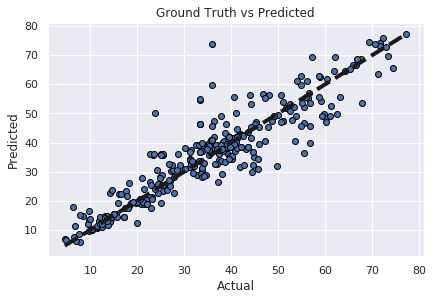

In [278]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

###  Supprt Vector Regressor with PCA

In [279]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [280]:
parameters = {'kernel': ['rbf', 'poly', 'linear'], 'C': list(range(1,100,5)), 'gamma':['auto']}
svrgs = GridSearchCV(SVR(), param_grid = parameters, cv = 10)

In [281]:
svrgs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61,
                               66, 71, 76, 81, 86, 91, 96],
                         'gamma': ['auto'],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [282]:
print(svrgs.score(X_train, y_train))
print(svrgs.score(X_test, y_test))

0.9199391495926185
0.8073720075294998


In [283]:
svrgs.best_params_

{'C': 56, 'gamma': 'auto', 'kernel': 'rbf'}

In [284]:
model_comparison.loc[len(model_comparison)] = 'SVR ith PCA', round(svrgs.score(X_train, y_train)*100,2), round(svrgs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33
22                          SVR Tuned           93.14       83.89
23                        SVR ith PCA           91.99       80.74

### Model Performance at 95% confidence level

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [286]:
svrbp = SVR(C = 61, gamma = 'auto', kernel= 'rbf')

In [287]:
results = cross_val_score(svrbp, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.90547808 0.7105217  0.88858104 0.83957988 0.81175013 0.87916091
 0.54486219 0.70295989 0.809261   0.89868914 0.8842657  0.91318618
 0.82305052 0.71316775 0.94370566 0.85731045 0.69387764 0.92389698
 0.80409177 0.81499866]
Accuracy: 81.812% (9.785%)


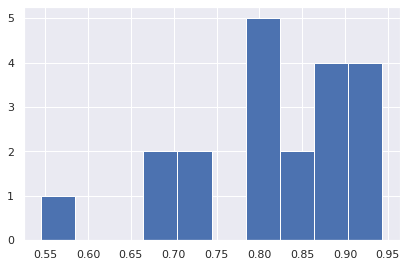

95.0 confidence interval 61.6% and 93.4%


In [288]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Random Forest Regressor

###  Normal Random Forest Regressor

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [290]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [293]:
print("Train Accuracy :\t",rfr.score(X_train, y_train))
print("Test  Accuracy :\t",rfr.score(X_test, y_test))

Train Accuracy :	 0.9735287710414279
Test  Accuracy :	 0.8689763858464792


In [294]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Regressor', round(rfr.score(X_train, y_train)*100,2), round(rfr.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33
22                          SVR Tuned           93.14       83.89
23                        SVR ith PCA           91.99       80.74
24            Random Forest Regressor           97.35       86.90

Feature Importance

In [295]:
feature_importances = rfr.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.36083305 0.08313794 0.01217123 0.11873203 0.04167352 0.02898929
 0.03873513 0.31572781]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

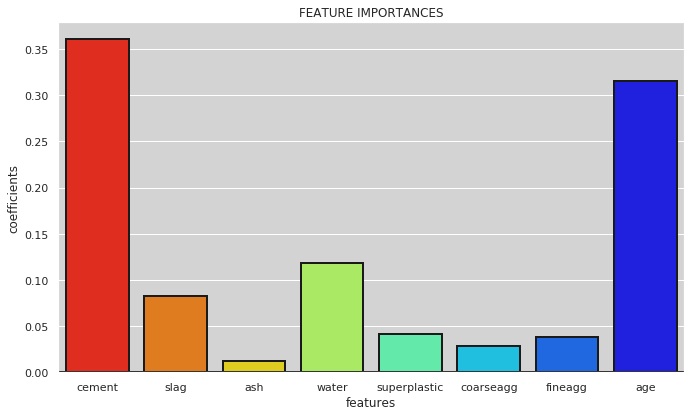

In [296]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(rfr.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

### 8.2 Random Forest Regressor with Hyper Parameter Tuning

In [297]:
parameters = { 'max_depth': [3,5,7,8,10,15],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 50, 70, 80, 100]}
rfrgs = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 10)

In [298]:
rfrgs.fit(X_train, y_train)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 8, 10, 

In [299]:
print(rfrgs.score(X_train, y_train))
print(rfrgs.score(X_test, y_test))

0.9797349738454088
0.8865320108534025


In [300]:
rfrgs.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [301]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Regressor Tuned', round(rfrgs.score(X_train, y_train)*100,2), round(rfrgs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33
22                          SVR Tuned           93.14       83.89
23                        SVR ith PCA           91.99       80.74
24            Random Forest Regressor           97.35       86.90
25      Random Forest Regressor Tuned           97.97       88.65

###  Random Forest Regressor with PCA

In [302]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [303]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [306]:
print("Train Accuracy :\t",rfr.score(X_train, y_train))
print("Test  Accuracy :\t",rfr.score(X_test, y_test))

Train Accuracy :	 0.9653978229934678
Test  Accuracy :	 0.807570393641063


In [305]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Regressor with PCA', round(rfr.score(X_train, y_train)*100,2), round(rfr.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33
22                          SVR Tuned           93.14       83.89
23                        SVR ith PCA           91.99       80.74
24            Random Forest Regressor           97.35       86.90
25      Random Forest Regressor Tuned           97.97       88.65
26   Random Forest Regressor with PCA           96.54       80.76

### Model Performance at 95% confidence level

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [309]:
rfr = RandomForestRegressor(max_depth=15,max_features='log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 70, random_state=11)

In [310]:
results = cross_val_score(rfr, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.90357413 0.61436475 0.83675635 0.71117071 0.84072342 0.85521324
 0.51174864 0.77340266 0.84831456 0.83159523 0.92243129 0.79348904
 0.87012494 0.70057627 0.90929792 0.82879506 0.42422365 0.9475276
 0.78232945 0.88296714]
Accuracy: 78.943% (13.357%)


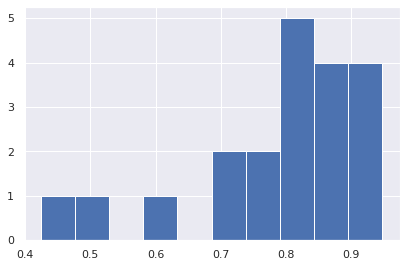

95.0 confidence interval 46.6% and 93.6%


In [311]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

##  Bagging Regressor

###  Normal Bagging Regressor

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [313]:
bagging = BaggingRegressor(random_state = 11)
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=11, verbose=0,
                 warm_start=False)

In [314]:
print(bagging.score(X_train, y_train))
print(bagging.score(X_test, y_test))

0.9751670794700508
0.8689340045659935


In [315]:
model_comparison.loc[len(model_comparison)] = 'Bagging Regressor', round(bagging.score(X_train, y_train)*100,2), round(bagging.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33
22                          SVR Tuned           93.14       83.89
23                        SVR ith PCA           91.99       80.74
24            Random Forest Regressor           97.35       86.90
25      Random Forest Regressor Tuned           97.97       88.65
26   Random Forest Regressor with PCA           96.54       80.76
27                  Bagging Regressor           97.52       86.89

###  Bagging Regressor with Hyperparameter Tuning

In [317]:
parameters ={'n_estimators': [10, 20, 30, 50, 70, 80, 100],
            'max_samples': [0.1, 0.2, 0.5, 1.0],
            'bootstrap': [True, False],
            'bootstrap_features': [True, False]}

In [318]:
bagginggs = GridSearchCV(BaggingRegressor(), param_grid = parameters, cv = 10)
bagginggs.fit(X_train, y_train)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_samples': [0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [10, 20, 30, 50, 70, 80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [319]:
print(bagginggs.score(X_train, y_train))
print(bagginggs.score(X_test, y_test))

0.9807711892069171
0.8894485516745099


In [320]:
bagginggs.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_samples': 1.0,
 'n_estimators': 80}

In [321]:
model_comparison.loc[len(model_comparison)] = 'Bagging Regressor Tuned', round(bagginggs.score(X_train, y_train)*100,2), round(bagginggs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33
22                          SVR Tuned           93.14       83.89
23                        SVR ith PCA           91.99       80.74
24            Random Forest Regressor           97.35       86.90
25      Random Forest Regressor Tuned           97.97       88.65
26   Random Forest Regressor with PCA           96.54       80.76
27                  Bagging Regressor           97.52       86.89
28            Bagging Regressor Tuned           98.08       88.94

###  Bagging Regressor with PCA

In [323]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [324]:
bagginggs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_samples': [0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [10, 20, 30, 50, 70, 80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [325]:
print("Train Accuracy :\t",bagginggs.score(X_train, y_train))
print("Test  Accuracy :\t",bagginggs.score(X_test, y_test))

Train Accuracy :	 0.9738989561078436
Test  Accuracy :	 0.820310636495577


In [326]:
bagginggs.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_samples': 1.0,
 'n_estimators': 70}

In [327]:
model_comparison.loc[len(model_comparison)] = 'Bagging Regressor with PCA', round(bagginggs.score(X_train, y_train)*100,2), round(bagginggs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33
22                          SVR Tuned           93.14       83.89
23                        SVR ith PCA           91.99       80.74
24            Random Forest Regressor           97.35       86.90
25      Random Forest Regressor Tuned           97.97       88.65
26   Random Forest Regressor with PCA           96.54       80.76
27                  Bagging Regressor           97.52       86.89
28            Bagging Regressor Tuned           98.08       88.94
29         Bagging Regressor with PCA           97.39       82.03

### Model Performance at 95% confidence level

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [329]:
bagging = BaggingRegressor(bootstrap= True,bootstrap_features= False,max_samples= 1.0,n_estimators= 100,random_state = 11)

In [330]:
results = cross_val_score(bagging, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.89645456 0.60305038 0.87060953 0.73713961 0.86273941 0.85092668
 0.53871139 0.82700621 0.81088397 0.80311781 0.91794302 0.81665553
 0.8817441  0.65647397 0.93130985 0.84117498 0.56555993 0.95543669
 0.7807232  0.86098273]
Accuracy: 80.043% (11.754%)


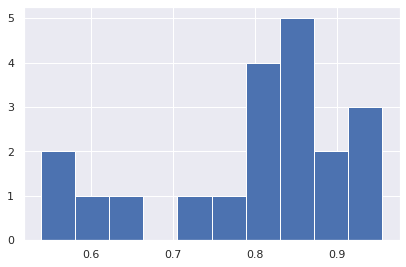

95.0 confidence interval 55.1% and 94.4%


In [331]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Gradient Descent Boosting Regressor

###  Normal Gradient Descent Boosting

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [333]:
gradboost = GradientBoostingRegressor(random_state = 11)
gradboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=11, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [334]:
print(gradboost.score(X_train, y_train))
print(gradboost.score(X_test, y_test))

0.9440403460593757
0.8817455193233402


In [335]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Regressor', round(gradboost.score(X_train, y_train)*100,2), round(gradboost.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33
22                          SVR Tuned           93.14       83.89
23                        SVR ith PCA           91.99       80.74
24            Random Forest Regressor           97.35       86.90
25      Random Forest Regressor Tuned           97.97       88.65
26   Random Forest Regressor with PCA           96.54       80.76
27                  Bagging Regressor           97.52       86.89
28            Bagging Regressor Tuned           98.08       88.94
29         Bagging Regressor with PCA           97.39       82.03
30        Gradient Boosting Regressor           94.40       88.17

Feature Importance

In [336]:
feature_importances = gradboost.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.3219047  0.0888151  0.00859347 0.13588119 0.03001579 0.01803265
 0.04188289 0.35487422]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

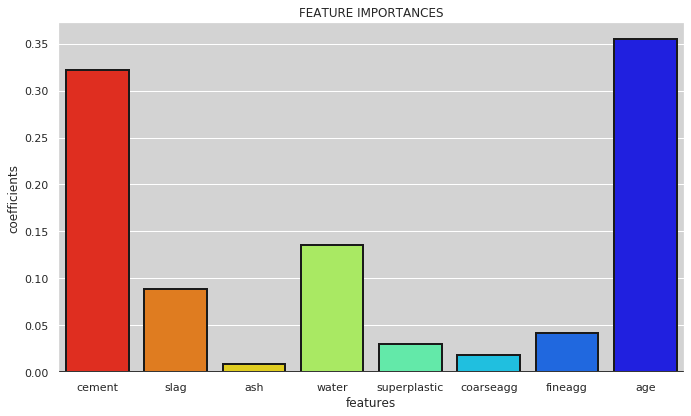

In [337]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(gradboost.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

###  Gradient Descent Boosting with Hyperprameter Tuning

In [338]:
parameters = {'n_estimators': [10, 20, 30, 50, 70, 80, 100],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
              'min_samples_split': [1.0, 2, 3, 5, 10],
              'min_samples_leaf': [1, 2, 3, 5, 10],
              'max_depth': [3, 5, 8],
              'max_features': ['log2', 'sqrt'],
              'criterion' : ['friedman_mse', 'mae'],
              'loss' : ['ls', 'lad', 'huber', 'quantile']}

In [339]:
gradboostrs = RandomizedSearchCV(GradientBoostingRegressor(),n_iter = 40, param_distributions = parameters, cv = 10)
gradboostrs.fit(X_train, y_train)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                           

In [340]:
print(gradboostrs.score(X_train, y_train))
print(gradboostrs.score(X_test, y_test))

0.9767131448432473
0.8975761838881393


In [341]:
gradboostrs.best_params_

{'n_estimators': 70,
 'min_samples_split': 3,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 8,
 'loss': 'huber',
 'learning_rate': 0.1,
 'criterion': 'mae'}

In [342]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Regressor Tuned', round(gradboostrs.score(X_train, y_train)*100,2), round(gradboostrs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           73.06       72.25
1         Regression (Ploynomial = 2)           85.94       83.38
2         Regression (Ploynomial = 3)           92.96       87.85
3     Linear Regression (Column Drop)           73.66       70.00
4          Linear Regression with PCA           71.54       65.34
5                    Ridge Regression           73.72       70.03
6      Ridge Regression (Column Drop)           73.66       70.01
7           Ridge Regression with PCA           71.54       65.34
8                    Lasso Regression           73.67       70.04
9      Lasso Regression (Column Drop)           72.36       67.64
10          Lasso Regression with PCA           71.52       65.61
11  Ridge Regression (Polynomial = 2)           71.54       65.34
12  Lasso Regression (Polynomial = 2)           71.54       65.37
13  Ridge Regression (Polynomial = 3)           84.64       63.27
14  Lasso Regression (Polynomial = 3)           84.55       66.93
15            Decision Tree Regressor           99.42       74.01
16    Decision Tree Regressor (Tuned)           95.11       80.54
17   Decision Tree Regressor with PCA           92.31       68.19
18                      KNN Regressor           85.26       72.11
19                KNN Regressor Tuned           85.26       72.11
20             KNN Regressor with PCA           85.05       71.22
21                                SVR           73.68       70.33
22                          SVR Tuned           93.14       83.89
23                        SVR ith PCA           91.99       80.74
24            Random Forest Regressor           97.35       86.90
25      Random Forest Regressor Tuned           97.97       88.65
26   Random Forest Regressor with PCA           96.54       80.76
27                  Bagging Regressor           97.52       86.89
28            Bagging Regressor Tuned           98.08       88.94
29         Bagging Regressor with PCA           97.39       82.03
30        Gradient Boosting Regressor           94.40       88.17
31  Gradient Boosting Regressor Tuned           97.67       89.76

###  Gradient Descent Boosting Regressor with PCA

In [343]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [344]:
gradboostrs.fit(X_train, y_train)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                           

In [345]:
print(gradboostrs.score(X_train, y_train))
print(gradboostrs.score(X_test, y_test))

0.9629181602207644
0.8270423519481274


In [346]:
gradboostrs.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 5,
 'loss': 'ls',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [347]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Regressor with PCA', round(gradboostrs.score(X_train, y_train)*100,2), round(gradboostrs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                      Linear Regression           73.06       72.25
1            Regression (Ploynomial = 2)           85.94       83.38
2            Regression (Ploynomial = 3)           92.96       87.85
3        Linear Regression (Column Drop)           73.66       70.00
4             Linear Regression with PCA           71.54       65.34
5                       Ridge Regression           73.72       70.03
6         Ridge Regression (Column Drop)           73.66       70.01
7              Ridge Regression with PCA           71.54       65.34
8                       Lasso Regression           73.67       70.04
9         Lasso Regression (Column Drop)           72.36       67.64
10             Lasso Regression with PCA           71.52       65.61
11     Ridge Regression (Polynomial = 2)           71.54       65.34
12     Lasso Regression (Polynomial = 2)           71.54       65.37
13     Ridge Regression (Polynomial = 3)           84.64       63.27
14     Lasso Regression (Polynomial = 3)           84.55       66.93
15               Decision Tree Regressor           99.42       74.01
16       Decision Tree Regressor (Tuned)           95.11       80.54
17      Decision Tree Regressor with PCA           92.31       68.19
18                         KNN Regressor           85.26       72.11
19                   KNN Regressor Tuned           85.26       72.11
20                KNN Regressor with PCA           85.05       71.22
21                                   SVR           73.68       70.33
22                             SVR Tuned           93.14       83.89
23                           SVR ith PCA           91.99       80.74
24               Random Forest Regressor           97.35       86.90
25         Random Forest Regressor Tuned           97.97       88.65
26      Random Forest Regressor with PCA           96.54       80.76
27                     Bagging Regressor           97.52       86.89
28               Bagging Regressor Tuned           98.08       88.94
29            Bagging Regressor with PCA           97.39       82.03
30           Gradient Boosting Regressor           94.40       88.17
31     Gradient Boosting Regressor Tuned           97.67       89.76
32  Gradient Boosting Regressor with PCA           96.29       82.70

### Model Performance at 95% confidence level

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [349]:
gradboost = GradientBoostingRegressor(n_estimators=80,min_samples_split=2,min_samples_leaf= 2,max_features='log2',max_depth= 8,
 loss= 'ls',learning_rate= 0.05,criterion='friedman_mse',random_state = 11)

In [350]:
results = cross_val_score(gradboost, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.9146041  0.66212824 0.88349764 0.75033183 0.87935853 0.81778251
 0.52310716 0.7997574  0.90624812 0.79576142 0.91612756 0.82753211
 0.85558728 0.71066028 0.94156445 0.82454174 0.3866517  0.96462037
 0.82787926 0.87552766]
Accuracy: 80.316% (13.899%)


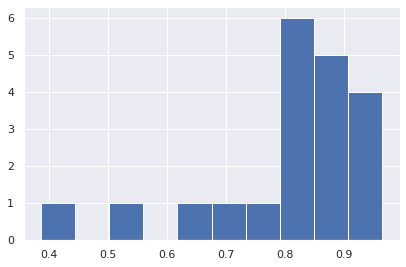

95.0 confidence interval 45.1% and 95.4%


In [351]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### ADA Boosting Regressor

###  Normal ADABoosting Regressor

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [353]:
adaboost = AdaBoostRegressor(random_state = 11)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=11)

In [354]:
print(adaboost.score(X_train, y_train))
print(adaboost.score(X_test, y_test))

0.7868273073364863
0.7484879049178277


In [355]:
model_comparison.loc[len(model_comparison)] = 'Ada Boosting Regressor', round(adaboost.score(X_train, y_train)*100,2), round(adaboost.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                      Linear Regression           73.06       72.25
1            Regression (Ploynomial = 2)           85.94       83.38
2            Regression (Ploynomial = 3)           92.96       87.85
3        Linear Regression (Column Drop)           73.66       70.00
4             Linear Regression with PCA           71.54       65.34
5                       Ridge Regression           73.72       70.03
6         Ridge Regression (Column Drop)           73.66       70.01
7              Ridge Regression with PCA           71.54       65.34
8                       Lasso Regression           73.67       70.04
9         Lasso Regression (Column Drop)           72.36       67.64
10             Lasso Regression with PCA           71.52       65.61
11     Ridge Regression (Polynomial = 2)           71.54       65.34
12     Lasso Regression (Polynomial = 2)           71.54       65.37
13     Ridge Regression (Polynomial = 3)           84.64       63.27
14     Lasso Regression (Polynomial = 3)           84.55       66.93
15               Decision Tree Regressor           99.42       74.01
16       Decision Tree Regressor (Tuned)           95.11       80.54
17      Decision Tree Regressor with PCA           92.31       68.19
18                         KNN Regressor           85.26       72.11
19                   KNN Regressor Tuned           85.26       72.11
20                KNN Regressor with PCA           85.05       71.22
21                                   SVR           73.68       70.33
22                             SVR Tuned           93.14       83.89
23                           SVR ith PCA           91.99       80.74
24               Random Forest Regressor           97.35       86.90
25         Random Forest Regressor Tuned           97.97       88.65
26      Random Forest Regressor with PCA           96.54       80.76
27                     Bagging Regressor           97.52       86.89
28               Bagging Regressor Tuned           98.08       88.94
29            Bagging Regressor with PCA           97.39       82.03
30           Gradient Boosting Regressor           94.40       88.17
31     Gradient Boosting Regressor Tuned           97.67       89.76
32  Gradient Boosting Regressor with PCA           96.29       82.70
33                Ada Boosting Regressor           78.68       74.85

Feature Importance

In [356]:
feature_importances = adaboost.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.34645509 0.06957772 0.00241591 0.16463314 0.059049   0.03168741
 0.0505061  0.27567563]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

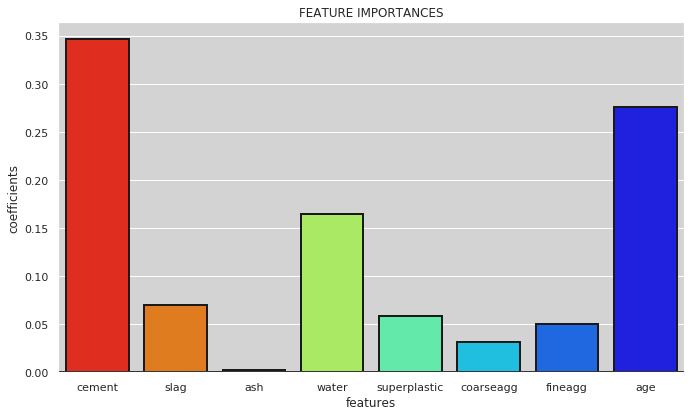

In [357]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(adaboost.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

###  ADA Boosting Regressor with Hyper Parameter Tuning

In [358]:
parameters = { 'n_estimators': [30,40,60,70],
 'loss': ['linear','square','exponential'],
  'learning_rate': [1,1.5]}
ada_cv = GridSearchCV(AdaBoostRegressor(), param_grid = parameters, cv = 10)

In [359]:
ada_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1, 1.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [30, 40, 60, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [360]:
print(ada_cv.score(X_train, y_train))
print(ada_cv.score(X_test, y_test))

0.8162925054148996
0.7765895746747937


In [361]:
ada_cv.best_params_

{'learning_rate': 1.5, 'loss': 'square', 'n_estimators': 60}

In [362]:
model_comparison.loc[len(model_comparison)] = 'Ada Boosting Regressor Tuned', round(ada_cv.score(X_train, y_train)*100,2), round(ada_cv.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                      Linear Regression           73.06       72.25
1            Regression (Ploynomial = 2)           85.94       83.38
2            Regression (Ploynomial = 3)           92.96       87.85
3        Linear Regression (Column Drop)           73.66       70.00
4             Linear Regression with PCA           71.54       65.34
5                       Ridge Regression           73.72       70.03
6         Ridge Regression (Column Drop)           73.66       70.01
7              Ridge Regression with PCA           71.54       65.34
8                       Lasso Regression           73.67       70.04
9         Lasso Regression (Column Drop)           72.36       67.64
10             Lasso Regression with PCA           71.52       65.61
11     Ridge Regression (Polynomial = 2)           71.54       65.34
12     Lasso Regression (Polynomial = 2)           71.54       65.37
13     Ridge Regression (Polynomial = 3)           84.64       63.27
14     Lasso Regression (Polynomial = 3)           84.55       66.93
15               Decision Tree Regressor           99.42       74.01
16       Decision Tree Regressor (Tuned)           95.11       80.54
17      Decision Tree Regressor with PCA           92.31       68.19
18                         KNN Regressor           85.26       72.11
19                   KNN Regressor Tuned           85.26       72.11
20                KNN Regressor with PCA           85.05       71.22
21                                   SVR           73.68       70.33
22                             SVR Tuned           93.14       83.89
23                           SVR ith PCA           91.99       80.74
24               Random Forest Regressor           97.35       86.90
25         Random Forest Regressor Tuned           97.97       88.65
26      Random Forest Regressor with PCA           96.54       80.76
27                     Bagging Regressor           97.52       86.89
28               Bagging Regressor Tuned           98.08       88.94
29            Bagging Regressor with PCA           97.39       82.03
30           Gradient Boosting Regressor           94.40       88.17
31     Gradient Boosting Regressor Tuned           97.67       89.76
32  Gradient Boosting Regressor with PCA           96.29       82.70
33                Ada Boosting Regressor           78.68       74.85
34          Ada Boosting Regressor Tuned           81.63       77.66

### Ada boosting regressor with PCA

In [363]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [364]:
ada_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1, 1.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [30, 40, 60, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [365]:
print(ada_cv.score(X_train, y_train))
print(ada_cv.score(X_test, y_test))

0.787335472554699
0.7255671617659436


In [366]:
ada_cv.best_params_

{'learning_rate': 1.5, 'loss': 'square', 'n_estimators': 60}

In [367]:
model_comparison.loc[len(model_comparison)] = 'Ada Boosting Regressor with PCA', round(ada_cv.score(X_train, y_train)*100,2), round(ada_cv.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                      Linear Regression           73.06       72.25
1            Regression (Ploynomial = 2)           85.94       83.38
2            Regression (Ploynomial = 3)           92.96       87.85
3        Linear Regression (Column Drop)           73.66       70.00
4             Linear Regression with PCA           71.54       65.34
5                       Ridge Regression           73.72       70.03
6         Ridge Regression (Column Drop)           73.66       70.01
7              Ridge Regression with PCA           71.54       65.34
8                       Lasso Regression           73.67       70.04
9         Lasso Regression (Column Drop)           72.36       67.64
10             Lasso Regression with PCA           71.52       65.61
11     Ridge Regression (Polynomial = 2)           71.54       65.34
12     Lasso Regression (Polynomial = 2)           71.54       65.37
13     Ridge Regression (Polynomial = 3)           84.64       63.27
14     Lasso Regression (Polynomial = 3)           84.55       66.93
15               Decision Tree Regressor           99.42       74.01
16       Decision Tree Regressor (Tuned)           95.11       80.54
17      Decision Tree Regressor with PCA           92.31       68.19
18                         KNN Regressor           85.26       72.11
19                   KNN Regressor Tuned           85.26       72.11
20                KNN Regressor with PCA           85.05       71.22
21                                   SVR           73.68       70.33
22                             SVR Tuned           93.14       83.89
23                           SVR ith PCA           91.99       80.74
24               Random Forest Regressor           97.35       86.90
25         Random Forest Regressor Tuned           97.97       88.65
26      Random Forest Regressor with PCA           96.54       80.76
27                     Bagging Regressor           97.52       86.89
28               Bagging Regressor Tuned           98.08       88.94
29            Bagging Regressor with PCA           97.39       82.03
30           Gradient Boosting Regressor           94.40       88.17
31     Gradient Boosting Regressor Tuned           97.67       89.76
32  Gradient Boosting Regressor with PCA           96.29       82.70
33                Ada Boosting Regressor           78.68       74.85
34          Ada Boosting Regressor Tuned           81.63       77.66
35       Ada Boosting Regressor with PCA           78.73       72.56

### Model Performance at 95% confidence level

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [369]:
adaboost = AdaBoostRegressor(learning_rate= 1.5, loss= 'square', n_estimators= 70,random_state = 11)

In [370]:
results = cross_val_score(adaboost, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.79979457 0.50732756 0.77941092 0.7654295  0.71633904 0.83828809
 0.47686062 0.7111392  0.76106202 0.83159367 0.88083243 0.66105544
 0.81493444 0.54671177 0.81315363 0.73806418 0.47638093 0.90603978
 0.65580646 0.7517803 ]
Accuracy: 72.160% (12.668%)


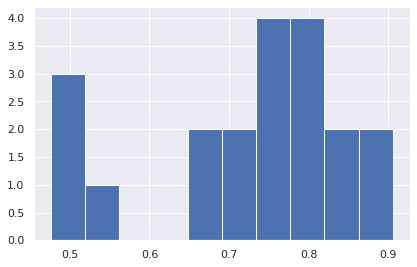

95.0 confidence interval 47.7% and 89.4%


In [371]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Exploring Guassians in the data

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [374]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(myData)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0             2    2.774485e+07
1             3    2.138626e+07
2             4    1.867142e+07
3             5    1.655794e+07

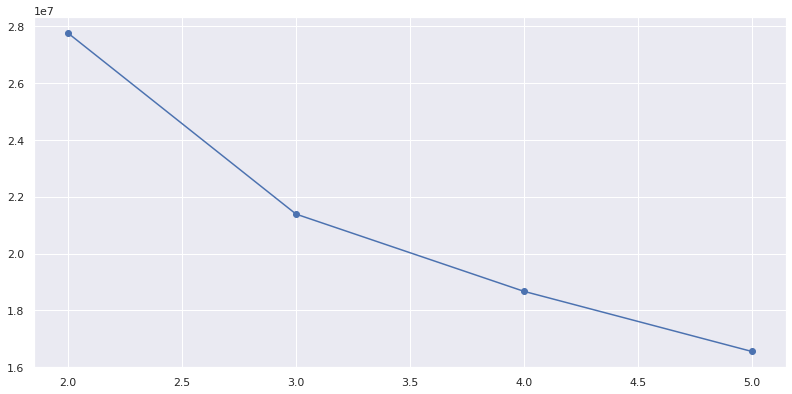

In [375]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters. Starting with 3 clusters.

In [379]:
cluster = KMeans( n_clusters = 3, random_state = 11 )
cluster.fit(X_train)

prediction=cluster.predict(X_train)
X_train["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

mdf_scaled_copy = X_train.copy(deep = True)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [380]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.07153221,  0.09597187, -0.80493902,  0.71582183, -0.97934894,
         0.25978057, -0.24589754, -0.00154776],
       [ 0.83831638,  0.67356776, -0.491399  , -0.81874066,  0.96611332,
        -0.71590842,  0.10206898, -0.07670663],
       [-0.63371151, -0.38648748,  1.14072633, -0.24480033,  0.4683854 ,
         0.06781881,  0.20854297,  0.12823854]])

In [384]:
centroid_df = pd.DataFrame(centroids, columns = list(X) )
centroid_df

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0  0.071532  0.095972 -0.804939  0.715822     -0.979349   0.259781 -0.245898   
1  0.838316  0.673568 -0.491399 -0.818741      0.966113  -0.715908  0.102069   
2 -0.633712 -0.386487  1.140726 -0.244800      0.468385   0.067819  0.208543   

        age  
0 -0.001548  
1 -0.076707  
2  0.128239

Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfcbf84190>,
      dtype=object)

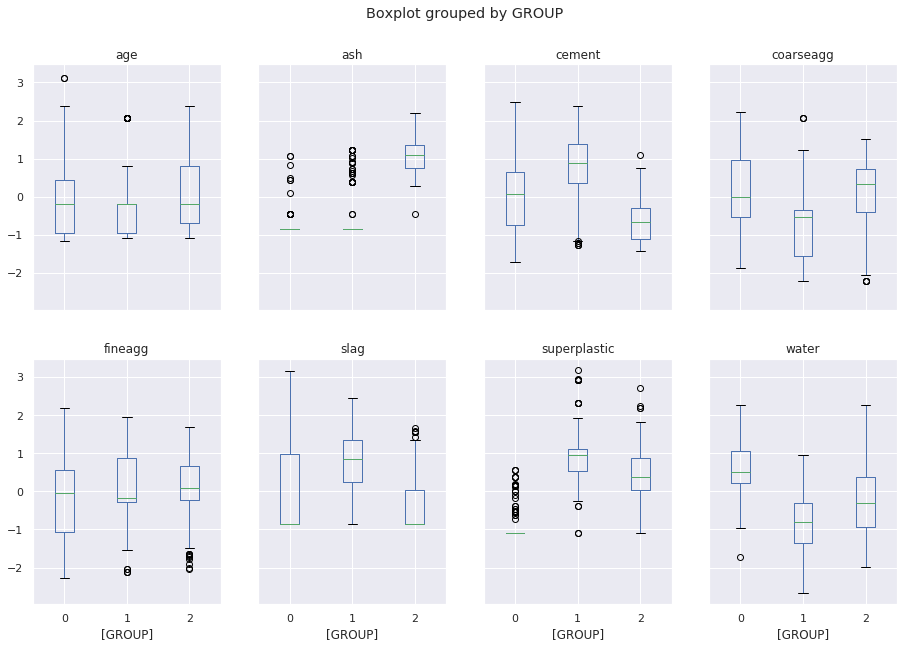

In [390]:
X_train.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

There are many outliers on each dimension  (indicated by the black circles).
Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers). If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier).

In [393]:
# Addressing outliers at group level

df_scaled_ot = X_train
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std #Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (df_scaled_ot.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(X_train['GROUP']))

/home/ratnesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfcaedcf10>,
      dtype=object)

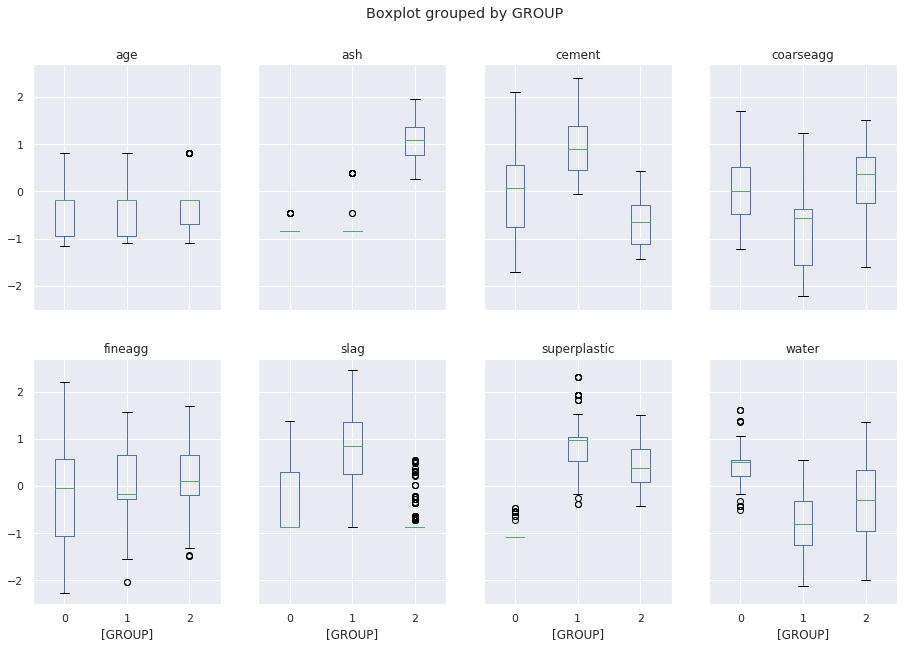

In [394]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

Analyzing cement column with other independent variables group wise

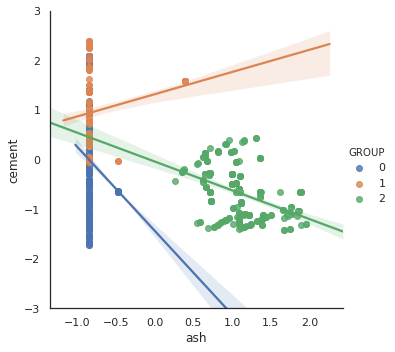

In [395]:
var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

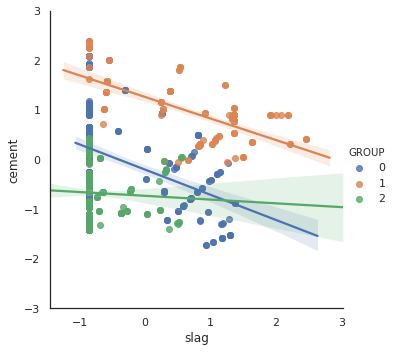

In [396]:
var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

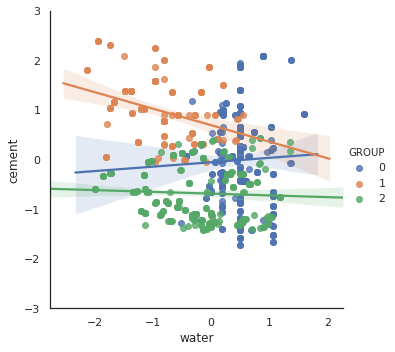

In [397]:
var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

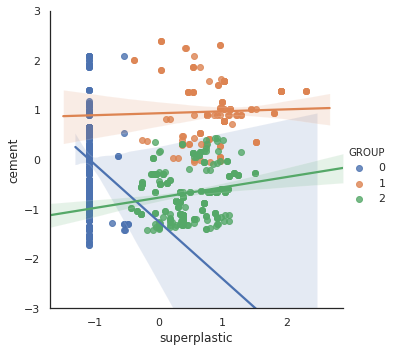

In [398]:
var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

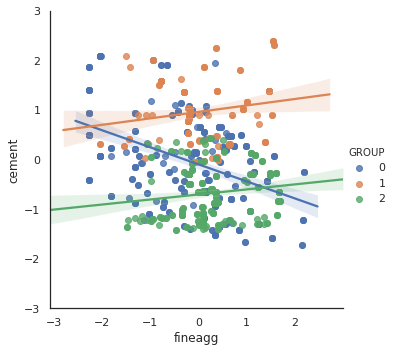

In [399]:
var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

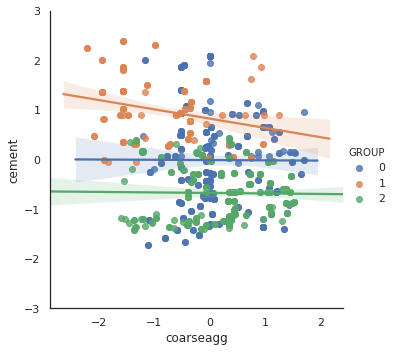

In [400]:
var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [401]:
# Let us break the data into 3 different groups

largestrength = concat_data[concat_data['GROUP']==0]
smallstrength = concat_data[concat_data['GROUP']==1]
mediumstrength = concat_data[concat_data['GROUP']==2]

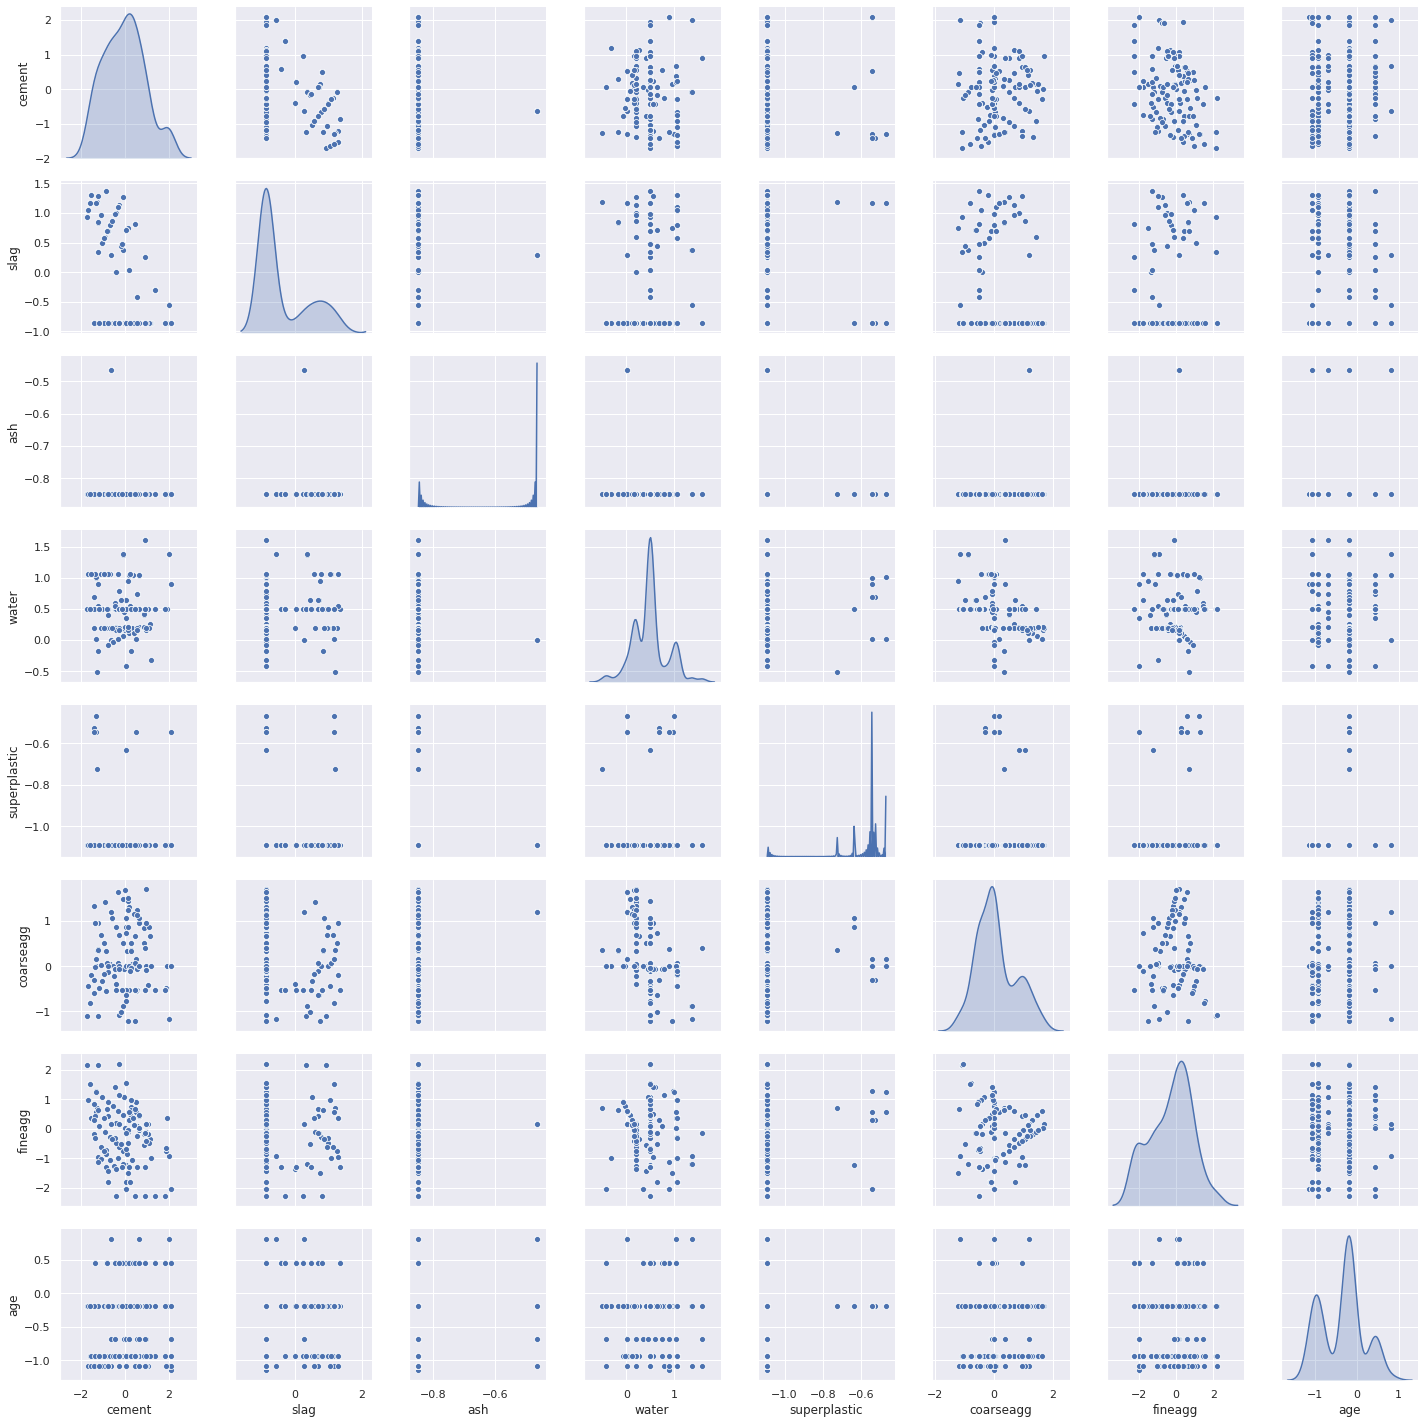

In [402]:
# Let us look at largestrength pair panel

df_large = largestrength.iloc[:, 0:8]   # CHANGE THE STRENGTH TYPE AT THIS POINT TO CHECK HOW THE MODEL PERFORMS FOR EACH GROUP

sns.pairplot(df_large, diag_kind='kde')   # to plot density curve instead of histogram

In [403]:
df_large.shape

(309, 8)

In [404]:
clr = SVR()  
array = df_large.values
X = array[:,1:7] 
y = array[:,0]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


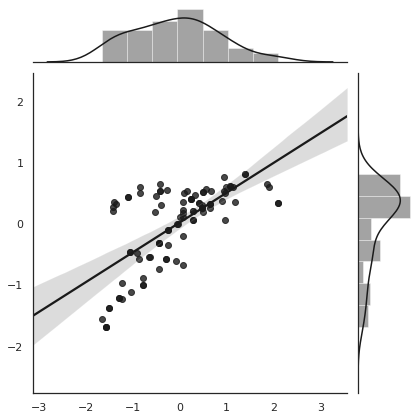

In [405]:
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

Most of the attributes are now showing almost gaussian distribution. The interaction between dimensions too is relatively more linear. But there is a lot of spread.

In [407]:
# Let us break the data into large strength and small strength segments

df_largestrength = myData[myData['strength'] >= 40]   
df_smallstrentgh = myData[myData['strength'] < 40]

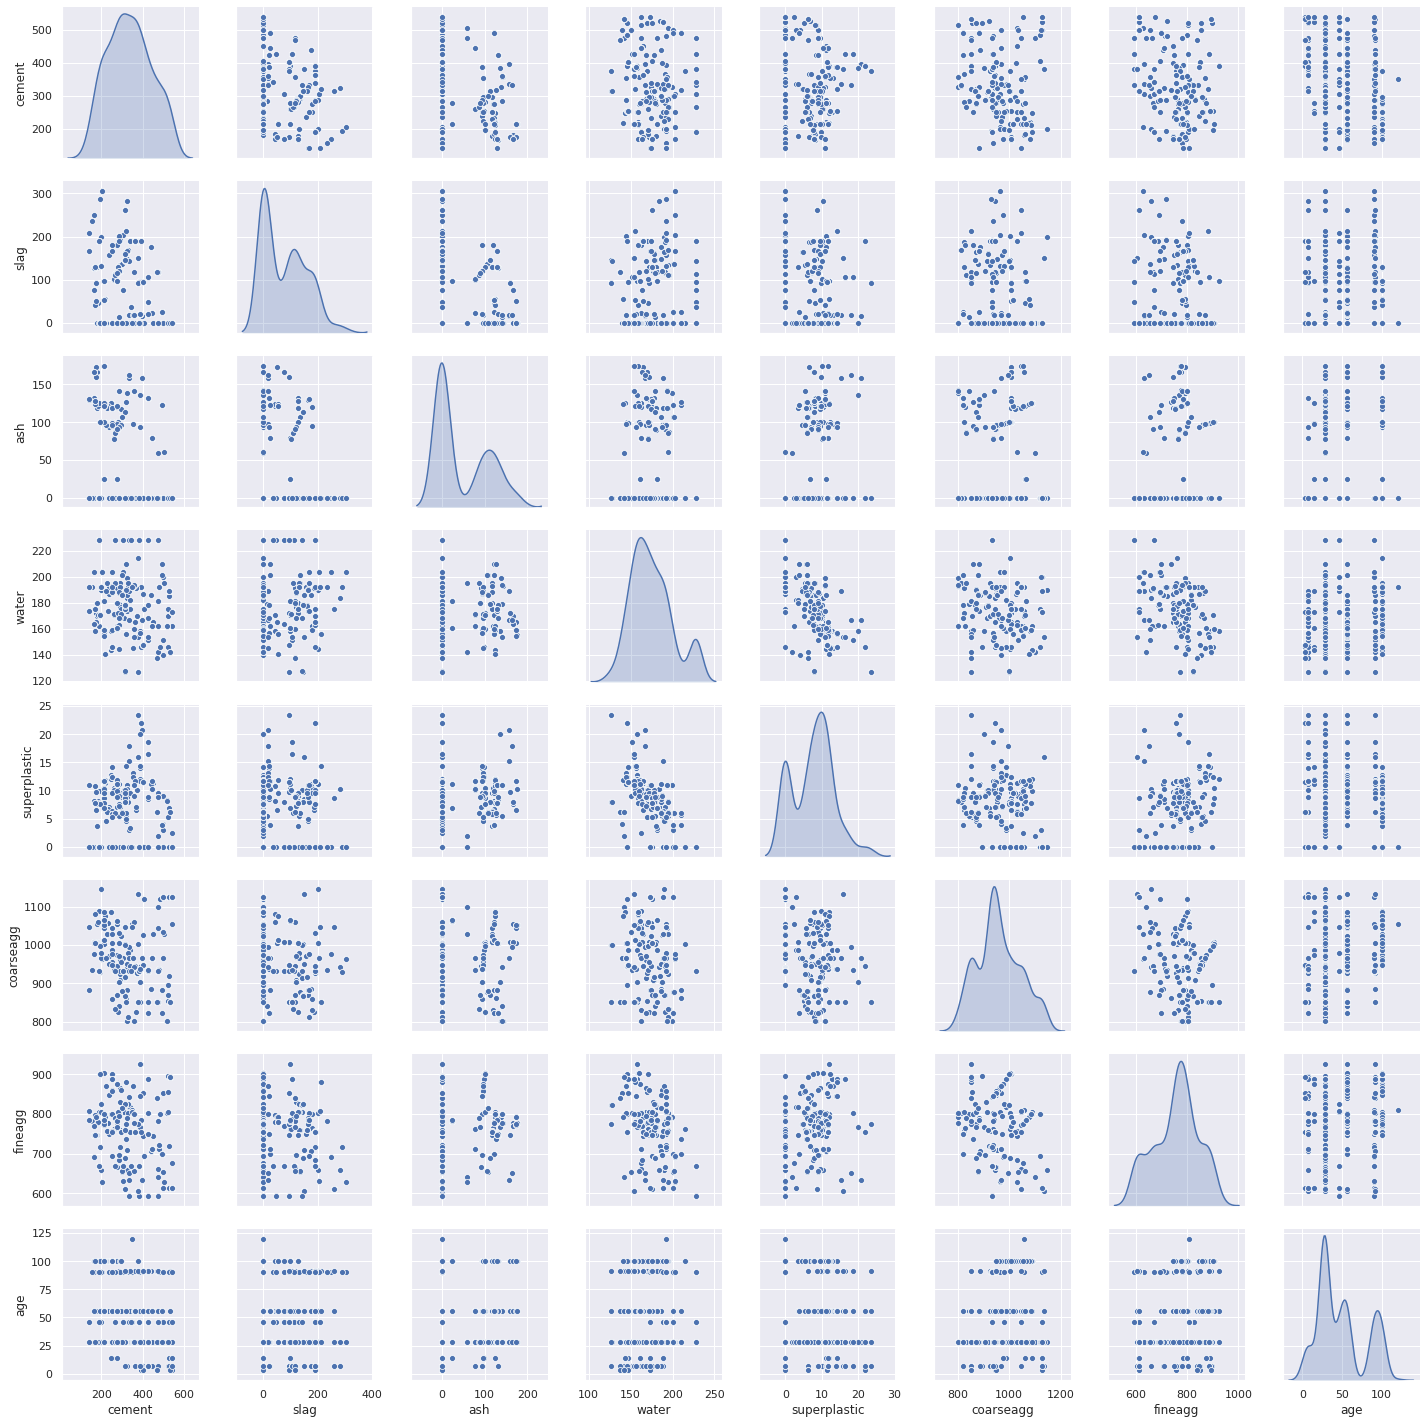

In [408]:
# Let us look at large strength pair panel

df_concrete_new = df_largestrength.iloc[:, 0:8]

sns.pairplot(df_concrete_new, diag_kind='kde')   

In [409]:
array = df_concrete_new.values
X = array[:,1:7] 
y = array[:,0]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [410]:
clr = SVR()  
clr.fit(X_train , y_train)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [411]:
y_pred = clr.predict(X_test)

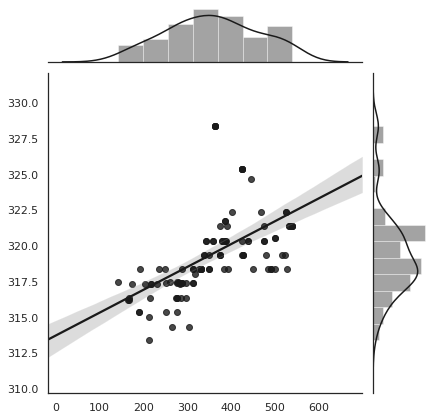

In [412]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [413]:
cols_to_drop = ["water", "coarseagg", "fineagg"]

cement_attr = df_concrete_new.drop(cols_to_drop , axis = 1)

cement_strength = np.array(cement_attr.pop('cement'))

In [414]:
cov_matrix = np.cov(cement_attr, rowvar=False)
np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()   
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [415]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained)
cum_var_exp

array([0.68437391, 0.9177435 , 0.99754846, 1.        ])

In [416]:
cement_strength = cement_strength.reshape(len(cement_strength), 1)
eigen_space = np.array(eigvectors_sort[0:1]).transpose()
proj_data_3D = np.dot(cement_attr, eigen_space)
names = ['pc1', 'cement']
cement_pca_array = np.concatenate((proj_data_3D, cement_strength), axis=1)
cement_pca_df = pd.DataFrame(cement_pca_array ,columns=names)
X = cement_pca_array[:,0:1] 
y = cement_pca_array[:,1]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [417]:
clr = SVR()  
clr.fit(X_train , y_train)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

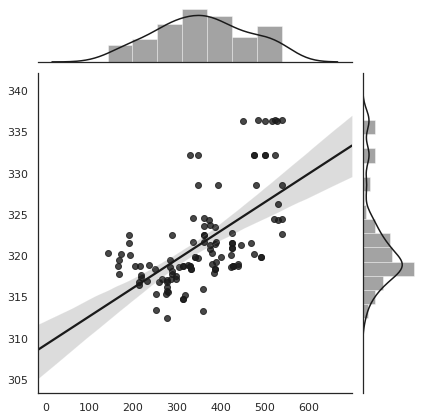

In [418]:
y_pred = clr.predict(X_test)            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

## Conclusion

In [419]:
model_comparison

Model Type  Training Score  Test Score
0                      Linear Regression           73.06       72.25
1            Regression (Ploynomial = 2)           85.94       83.38
2            Regression (Ploynomial = 3)           92.96       87.85
3        Linear Regression (Column Drop)           73.66       70.00
4             Linear Regression with PCA           71.54       65.34
5                       Ridge Regression           73.72       70.03
6         Ridge Regression (Column Drop)           73.66       70.01
7              Ridge Regression with PCA           71.54       65.34
8                       Lasso Regression           73.67       70.04
9         Lasso Regression (Column Drop)           72.36       67.64
10             Lasso Regression with PCA           71.52       65.61
11     Ridge Regression (Polynomial = 2)           71.54       65.34
12     Lasso Regression (Polynomial = 2)           71.54       65.37
13     Ridge Regression (Polynomial = 3)           84.64       63.27
14     Lasso Regression (Polynomial = 3)           84.55       66.93
15               Decision Tree Regressor           99.42       74.01
16       Decision Tree Regressor (Tuned)           95.11       80.54
17      Decision Tree Regressor with PCA           92.31       68.19
18                         KNN Regressor           85.26       72.11
19                   KNN Regressor Tuned           85.26       72.11
20                KNN Regressor with PCA           85.05       71.22
21                                   SVR           73.68       70.33
22                             SVR Tuned           93.14       83.89
23                           SVR ith PCA           91.99       80.74
24               Random Forest Regressor           97.35       86.90
25         Random Forest Regressor Tuned           97.97       88.65
26      Random Forest Regressor with PCA           96.54       80.76
27                     Bagging Regressor           97.52       86.89
28               Bagging Regressor Tuned           98.08       88.94
29            Bagging Regressor with PCA           97.39       82.03
30           Gradient Boosting Regressor           94.40       88.17
31     Gradient Boosting Regressor Tuned           97.67       89.76
32  Gradient Boosting Regressor with PCA           96.29       82.70
33                Ada Boosting Regressor           78.68       74.85
34          Ada Boosting Regressor Tuned           81.63       77.66
35       Ada Boosting Regressor with PCA           78.73       72.56

Gradient Descent Bossting Regressor after Hyper Parameter Tuning seems to be the best model for this dataset.